<h1><font size=6 color=darkred><center> $\fbox{Statistique et apprentissage pour la prévision}$ </center></h1>
<font color=dimgrey size=3><center> $Edna\space Halidath \space RADJI, \space Linda\space DINGUIR\space et \space Rizlène \space BANAT$ </center></h1>

⚠️ Le temps total d'éxécution de ce notebook est assez long : entre 1h30 et 2h ! ⚠️<br>

# Table des matières

## [Importation des librairies](#Imp)

## [1. Analyse Descriptive](#Analyse)
- [1.1. Problématique](#Problématique)
- [1.2. Présentation des données](#PrezDonnees)
    - [1.2.1. Le jeu de données principal](#Donnees_Principal)
    - [1.2.2. Le jeu de données intermédiaires](#Donnees_Intermédiaires)
    - [1.2.3. Jeu de données final](#Donnees_Finale)
- [1.3. Visualisation des données](#VizDonnees)
    - [1.3.1. Affluence vs Covid](#Metro_vs_Covid)
    - [1.3.2. Affluence vs Vacances d'Ete](#Metro_vs_VacsEte)
    - [1.3.3. Affluence vs Typologie du Jour](#Metro_vs_TypeJour)
        
## [2. Construction des modèles](#Construction)
- [2.1. Préparation des données](#PréparationDonnées)
    - [2.1.1. Retraitement des données](#RetraitementDonnees)
    - [2.1.2. Séparation des données d'aprentissage et de test](#Train_Test_Split)
    - [2.1.3. Etape de construction des modèles](#Construction_Modèle)
- [2.2. Un peu de Régression Linéaire : Le modèle Ridge](#Ridge)
    - [2.2.1. Principe](#Principe_Ridge)
    - [2.2.2. Construction du modèle](#Construction_Ridge)
        - [2.2.2.a. Entraînement du modèle Ridge](#Train_Ridge)
        - [2.2.2.b. Prédiction du modèle Ridge](#Test_Ridge)
- [2.3. Un peu de Bagging : Le modèle Random Forest](#RandomForest)
    - [2.3.1. Principe](#Principe_RandomForest)
    - [2.3.2. Construction du modèle](#Construction_RandomForest)
        - [2.3.2.a. Entraînement du modèle RandomForest](#Train_RandomForest)
        - [2.3.2.b. Prédiction du modèle RandomForest](#Test_RandomForest)
- [2.4. Un peu de Boosting : Le modèle XGBoost](#XGBoost)
    - [2.4.1. Principe](#Principe_XGBoost)
    - [2.4.2. Construction du modèle](#Construction_XGBoost)
        - [2.4.2.a. Entraînement du modèle XGBoost](#Train_XGBoost)
        - [2.4.2.b. Prédiction du modèle XGBoost](#Test_XGBoost)
- [2.6. Le modèle LSTM](#LSTM)
    - [2.6.1. Principe](#Principe_LSTM)
    - [2.6.2. Construction du modèle](#Construction_LSTM)
        - [2.6.2.a. Entraînement du modèle LSTM](#Train_LSTM)
        - [2.6.2.b. Prédiction du modèle LSTM](#Test_LSTM)
        
## [3. Combinaison des modèles](#Aggregation)
- [3.1. Principe](#Principe_Comb)
- [3.2. Agrégation Offline](#Agg_Offline)
- [3.3. Agrégation Online](#Agg_Online)
        
## [4. Apprentissage en ligne](#Online)
- [4.1. Principe](#Principe_Online)
- [4.2. Construction du modèle d'Apprentissage en ligne](#Construction_Learning_Online)

## [5. Analyse des résultats](#Comparaison)
- [5.1. Analyse des métriques](#Metriques)
    - [5.1.1. Définitions](#Def_Metriques)
        - [5.1.1.a. Erreur quadratique moyenne (MSE) et Ecart quadratique moyen (RMSE)](#MSE_RMSE)
        - [5.1.1.b. Erreur absolue moyenne (MAE)](#MAE)
    - [5.1.2. Comparaison des métriques](#Comp_Metriques)
- [5.2. Analyse des résidus](#Résidus)
    - [5.2.1. Linéarité des résidus](#Linéarité_Résidus)
    - [5.2.2. Indépendance des résidus](#Indépendance_Résidus)
        - [5.2.2.a. Graphique d'autocorrélation des résidus (ACF)](#ACF)
        - [5.2.2.b. Test de Durbin-Watson](#DW)
    - [5.2.3. Loi des résidus](#Loi_Résidus)
        - [5.2.3.a. Histogramme des résidus standardisés](#Hist_res_std)
        - [5.2.3.b. Diagramme Quantile-Quantile](#QQ-plot)
    - [5.2.4. Homogénéïté des résidus](#Homogénéité_Résidus)
    
## [6. Conclusion](#Conclusion)
- [6.1. Difficultés rencontrées](#Difficultes)
- [6.2. Ouvertures](#Ouvertures)

    
## [Bibliographies](#Bibli)

<h2><font size=6> Importation des librairies<a name="Imp"></a></h2>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from random import random, choice, choices, sample
#plt.style.use("fivethirtyeight")

import pandas as pd
pd.options.display.expand_frame_repr = False
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 1000

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, median_absolute_error, mean_squared_log_error

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor, XGBRFRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from math import sqrt
import seaborn as sns

from random import random

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

print("import ok")

start_time0 = time.time()

pandas ok
sklearn ok
xgb ok
tensorflow ok
import ok


<h2><font size=6> 1. Analyse Descriptive <a name="Analyse"></a></h2>

<h3><font size=5> 1.1. Problématique <a name="Problématique"></a></h3>

En tant que Franciliens, nous sommes confrontés quotidiennement aux moyens de transport tels que le métro, le RER, le tramway et les bus pour nos déplacements quotidiens. Certaines lignes sont plus fréquentées que d'autres en fonction de l'heure de la journée, ce qui entraîne des ralentissements du trafic, voire des problèmes plus graves tels que des malaises voyageurs ou des accidents sur les voies ferrées. Vous trouverez ci-dessous un classement exhaustif des métros parisiens en fonction de leur popularité.

<img src="images/classement_metro.jpg" width="500" height="340">

Chacun d'entre nous cherche à minimiser le temps passé dans les transports en commun. Cependant, certaines stations sont inévitables, notamment celles qui offrent plusieurs correspondances. Par conséquent, plus une station dispose de correspondances, plus elle enregistre de validations par jour. Ainsi, il peut y avoir des jours où le trafic est complètement saturé dans certaines stations.

<img src="images/metro.jpg" width="500" height="340">

Étant nous-mêmes étudiantes en région parisienne et directement concernées par ce problème, nous avons entrepris de prédire le nombre de validations quotidien par station de métro sur la ligne 1 en Île-de-France. Nous avons choisi cette ligne car elle constitue un axe majeur de communication est-ouest pour la ville, étant historiquement la plus fréquentée du réseau et la première à être automatisée.

Nous sommes convaincues que ce type de prédiction peut être extrêmement bénéfique pour tous les utilisateurs des transports en commun parisiens. En effet, à partir de ces prédictions (sous réserve de leur fiabilité), nous pouvons anticiper le nombre de métros nécessaires pour la journée ou encore le personnel requis pour gérer l'afflux et prévenir les incidents avec les passagers. Cela pourrait également contribuer à réguler le trafic sur les autres lignes, étant donné que nous savons qu'elles sont interconnectées.

Pour répondre à cette problématique, nous avons collecté des données sur le nombre de validations des voies ferrées à partir des sites de la SNCF, de la RATP et des données ouvertes de la ville de Paris.

<h3><font size=5> 1.2. Présentation des données <a name="PrezDonnees"></a></h3>

Pour notre projet du cours de Statistique et Apprentissage pour la prévision, nous avons choisi d'utiliser deux ensembles de données : un jeu de données principal et un jeu de données intermédiaires que nous avons ensuite joint.

<h4><font size=4> 1.2.1. Le jeu de données principal <a name="Donnees_Principal"></a></h4>

Le jeu de données principal retranscrit le nombre de validations des voyageurs par jour, par arrêt et par titre de transport sur le réseau ferré en Ile-de-France de 2015 jusqu'à aujourd'hui. 
Nous avons obtenu ce jeu de données à partir de deux liens différents sur le site de la SNCF :  

- https://datasncf.opendatasoft.com/explore/dataset/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre/information/ (les données du 1er Janvier 2022 au 30 Juin 2022)
- https://prim.iledefrance-mobilites.fr/fr/donnees-statiques/histo-validations-reseau-ferre (les données du 1er Janvier 2015 au 31 Décembre 2021)

Dans ce jeu de données, nous nous intéressons uniquement à la date, à la station et au nombre de validations. Nous avons donc décidé de conserver uniquement ces trois variables.

**Comment ces données sont-elles obtenues ?**

Depuis plusieurs années, Ile-de-France Mobilités a pris la décision de généraliser le passage des titre de transport magnétiques sur support télébilléttique avec le Pass Navigo.
Dans ce cadre, un système d'information décisionnel a été mis en place pour obtenir une meilleure connaissance de la mobilité des usagers.

Ce système permet la remontée des données de validation depuis les opérateurs jusqu’à Ile-de-France Mobilités, puis leur uniformisation et leur archivage.
Dès lors, chaque fois qu’un usager valide son passe Navigo sur le réseau francilien, une information anonyme est transmise à un système central permettant la collecte et le calcul de statistiques sur la mobilité.

On observe, par exemple, 11 millions de validations remontées par jour ouvrable, 5 millions un samedi et 3 millions un dimanche. Au total, près de 2,7 milliards de validations sont enregistrées chaque année.
    

<h4><font size=4> 1.2.2. Le jeu de données intermédiaire <a name="Donnees_Intermédiaires"></a></h4>

L'affluence d'une ligne de transport dépend fortement du jour et de la période de l'année. Par exemple, lors d'une journée de grève, un dimanche, ou encore le 31 décembre, le nombre de validations ne sera pas le même que lors d'une journée lambda. C'est pourquoi nous avons décidé d'inclure un jeu de données événementiel qui décrit les jours de grève, les périodes de vacances, les jours fériés et les fêtes importantes.

Notre problématique étant de prédire le nombre de validations par jour et par arrêt, nous avons jugé pertinent d'identifier les jours de grève, les périodes de vacances, les jours de fêtes, ainsi que d'autres événements importants tels que les périodes de confinement et de couvre-feu liées à la situation du Covid-19. 
En les incluant dans notre analyse, nous espérons obtenir des prédictions plus précises.

Voici les étapes que nous avons suivies :

- Nous avons recensé toutes les grèves liées aux transports qui ont eu lieu entre le 1er janvier 2015 et le 31 décembre 2021. Nous avons trouvé ces informations sur le site [https://www.cestlagreve.fr/]. Nous avons classé les jours de grève selon trois modalités :
    - "Aucune", si aucune grève n'a eu lieu ce jour-là.
    - "Forte", s'il s'agissait d'une grève pouvant impacter le trafic sur la ligne 1 (grèves des RER, grèves à Châtelet-les-halles, grèves nationales, etc...).
    - "Faible" sinon (grèves des travailleurs, etc ...).
    
- Ensuite, nous avons répertorié tous les jours fériés, les jours de fêtes et les périodes de vacances scolaires de ces sept années sur les sites [https://www.jour-ferie.info/dates-des-fetes-et-jours-feries-en-2022/ ] et [ https://vacances-scolaires.education/annee-2021-2022.php ]. Nous avons choisi de conserver les noms des jours fériés, des jours de fêtes et des périodes de vacances afin que nos modèles de prédiction puissent les distinguer.

- Enfin, nous avons ajouté à nos données les périodes de confinement et de couvre-feu survenues pendant les années marquées par la pandémie de Covid-19. Nous avons récupéré ces informations sur le site Wikipédia [https://fr.wikipedia.org/wiki/Confinements_li%C3%A9s_%C3%A0_la_pand%C3%A9mie_de_Covid-19_en_France#:~:text=du%2017%20mars%20au%2011,non%20inclus%2C%20soit%2028%20jours. ] et [ https://www.vie-publique.fr/en-bref/277391-covid-19-couvre-feu-18-heures-partir-du-16-janvier ]

Une fois toutes ces analyses et codifications effectuées, nous obtenons enfin notre jeu de données final, et notre étude statistique peut maintenant commencer.

<h4><font size=4> 1.2.3. Jeu de données final <a name="Donnees_Finale"></a></h4>

Maintenant que nous avons décrits nos différents jeux de données, nous les avons joints.
*(La jointure des données a été faite en amont. Voir le notebook "**Préparation des données**" pour plus de détails sur la procédure.)*

Après avoir fusionné nos jeux de données, nous avons ajouté des variables supplémentaires qui indiquent le mois, le jour de la semaine, le jour de l'année et l'année. 

In [3]:
# Base de données jointe
data = pd.read_csv("Bases/Base_NBVALD.csv", index_col="date", parse_dates=True)

Voici ce que nous obtenons comme base finale :

In [4]:
data.head(2)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,type_jour,num_mois,type_mois,annee
date,,,,,,,,,,,,
2015-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,124174,3,Jeudi,1,Janvier,2015
2015-01-02,Aucun,Aucun,Faible,Noël,Aucun,Aucun,383734,4,Vendredi,1,Janvier,2015


Nous avons donc **11 variables** à notre disposition pour construire nos modèles :
- **nb_validation** :  le nombre de validations à une date donnée.
- **greve** : niveau d'intensité de la grève avec les modalités "Aucun", "Forte" ou "Faible".
- **ferie** : description du jour férié, ou "Aucun" s'il ne s'agit pas d'un jour férié.
- **fetes** : description du jour de fête, ou "Aucun" s'il ne s'agit pas d'un jour de fête.
- **vacances** : type de vacances (Noël, Toussaint, etc...).
- **confinement** : répertorie les différents confinements qui ont eu lieu sur la période de la Covid.
- **couvre_feu** : répertorie les différents couvre-feux ui ont été mis en place sur la période de la Covid.
- **num_mois** : attribue à chaque mois de l'année un chiffre (Janvier : 1, Février :2 ...).
- **annee** : année correspondante.
- **type_jour** : jour de la semaine correspondant à la date considérée
- **num_jour** : attribue à chaque jour de la semaine, un chiffre (Lundi : 1, Mardi :2 ...)

Il est important de noter que notre jeu de données ne comporte aucune donnée manquante, ce qui nous offre un ensemble de données complet et riche pour nos analyses.

<h3><font size=5> 1.3. Visualisation des données <a name="VizDonnees"></a></h3>

Nous allons maintenant procéder à la visualisation des données fusionnées afin de détecter d'éventuels schémas ou patterns.

Notre attention sera particulièrement portée sur les événements tels que les périodes de vacances, les périodes de confinement et leur impact sur l'affluence des métros, etc.

Cette analyse nous permettra d'identifier d'éventuelles tendances ou corrélations entre les événements et l'affluence des métros.


Commençons par analyser l'impact du Covid sur l'affluence des métros !

<h4><font size=4> 1.3.1. Affluence vs Covid <a name="Metro_vs_Covid"></a></h4>

Traçons un graphique de la série temporelle montrant le nombre de validations quotidien au cours de la période étudiée. Cela nous permettra d'observer les tendances générales, les variations saisonnières et les motifs récurrents.

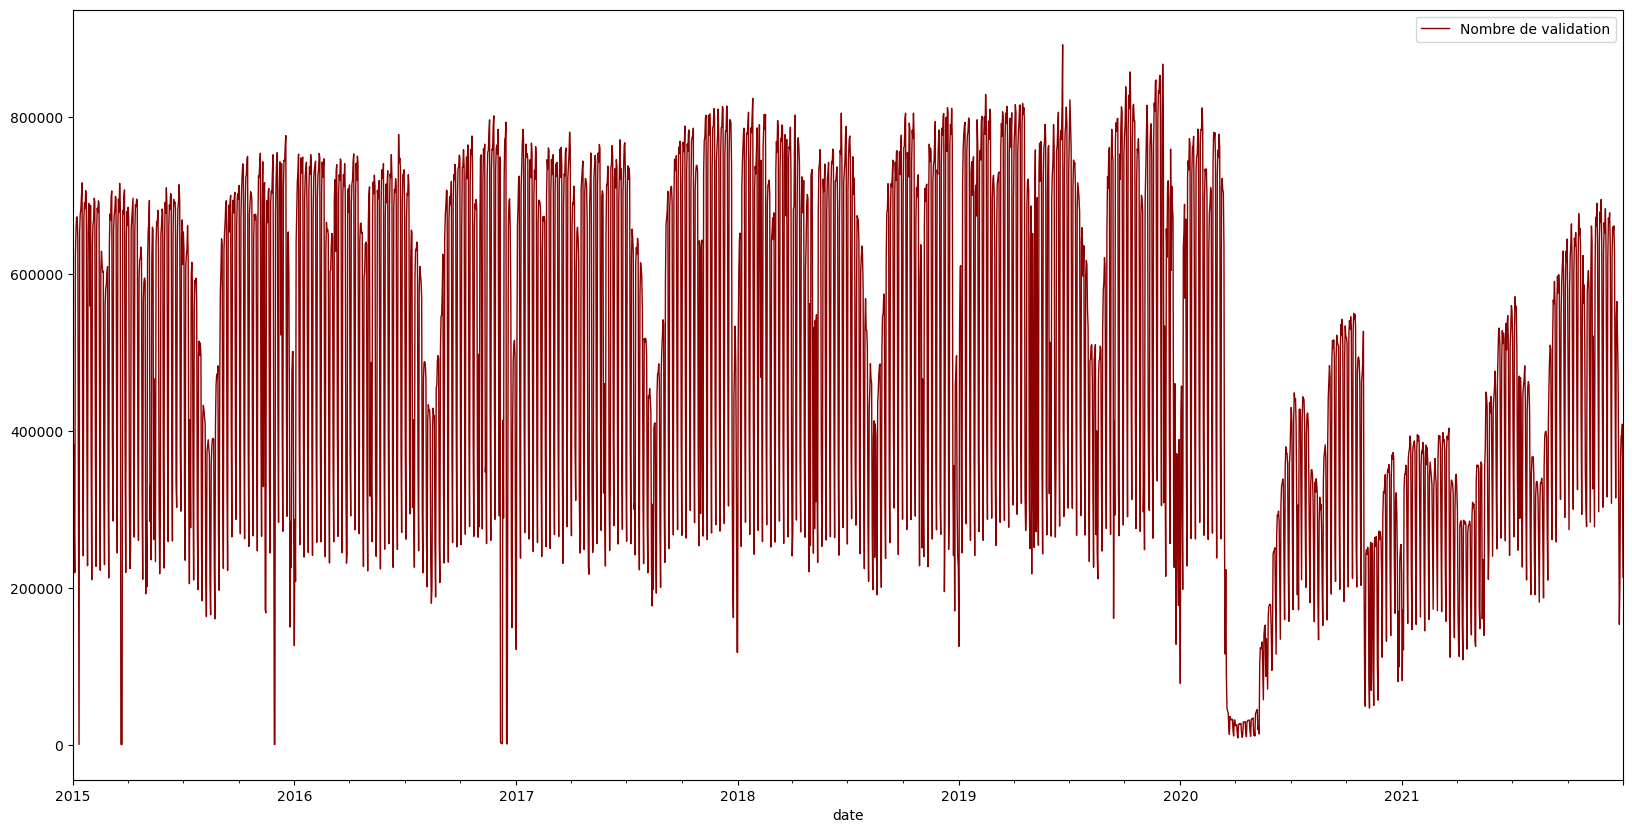

In [5]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)
plt.legend()
plt.savefig('Affluence au cours du temps.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous pouvons relever des informations très importantes que nous avons précédemment survolées. Par exemple, nous constatons une baisse significative du nombre de validations en 2020. L'année 2020  a été marquée par la pandémie de Covid-19, les confinements et les couvre-feux. Nous allons regarder ce qu'il se passe de plus prés. 

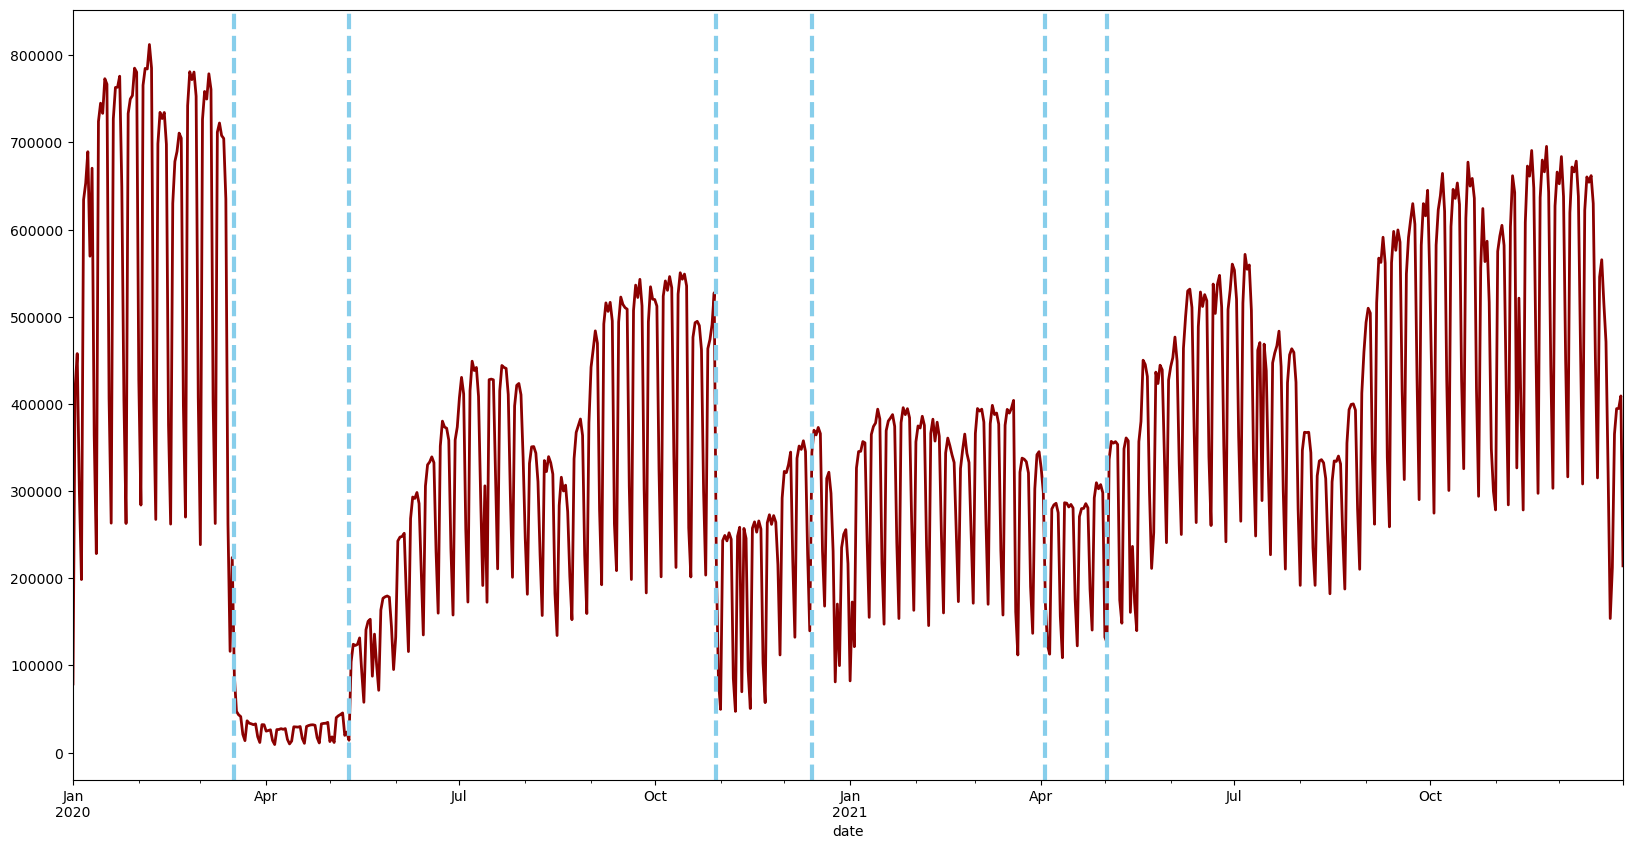

In [6]:
plt.figure(figsize=(20,10))

data.loc["2020":"2021","nb_validation"].plot(c="darkred", lw=2)

# Confinement
plt.axvline(x="2020-03-17", color="skyblue", lw=3, ls="--")
plt.axvline(x="2020-05-10", color="skyblue", lw=3, ls="--")

plt.axvline(x="2020-10-30", color="skyblue", lw=3, ls="--")
plt.axvline(x="2020-12-14", color="skyblue", lw=3, ls="--")

plt.axvline(x="2021-04-03", color="skyblue", lw=3, ls="--")
plt.axvline(x="2021-05-02", color="skyblue", lw=3, ls="--")

#plt.legend()
plt.savefig('Affluence vs Confinement.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Cette fois-ci, nous avons représenté nos données pour la période allant du 1er janvier 2020 au 30 septembre 2021, englobant ainsi toutes les périodes de confinement, de couvre-feu et de restrictions sanitaires.

Nous observons clairement une baisse du nombre de validations lors de chaque confinement, ce qui est parfaitement compréhensible. En particulier, la baisse est plus prononcée lors du premier confinement, qui était le plus strict en termes de restrictions.

Ces périodes exceptionnelles doivent être prises en compte dans notre analyse afin de ne pas fausser nos prédictions.

<h4><font size=4> 1.3.2. Affluence vs Vacances d'été <a name="Metro_vs_VacsEte"></a></h4>

Revenons à notre graphique de départ.

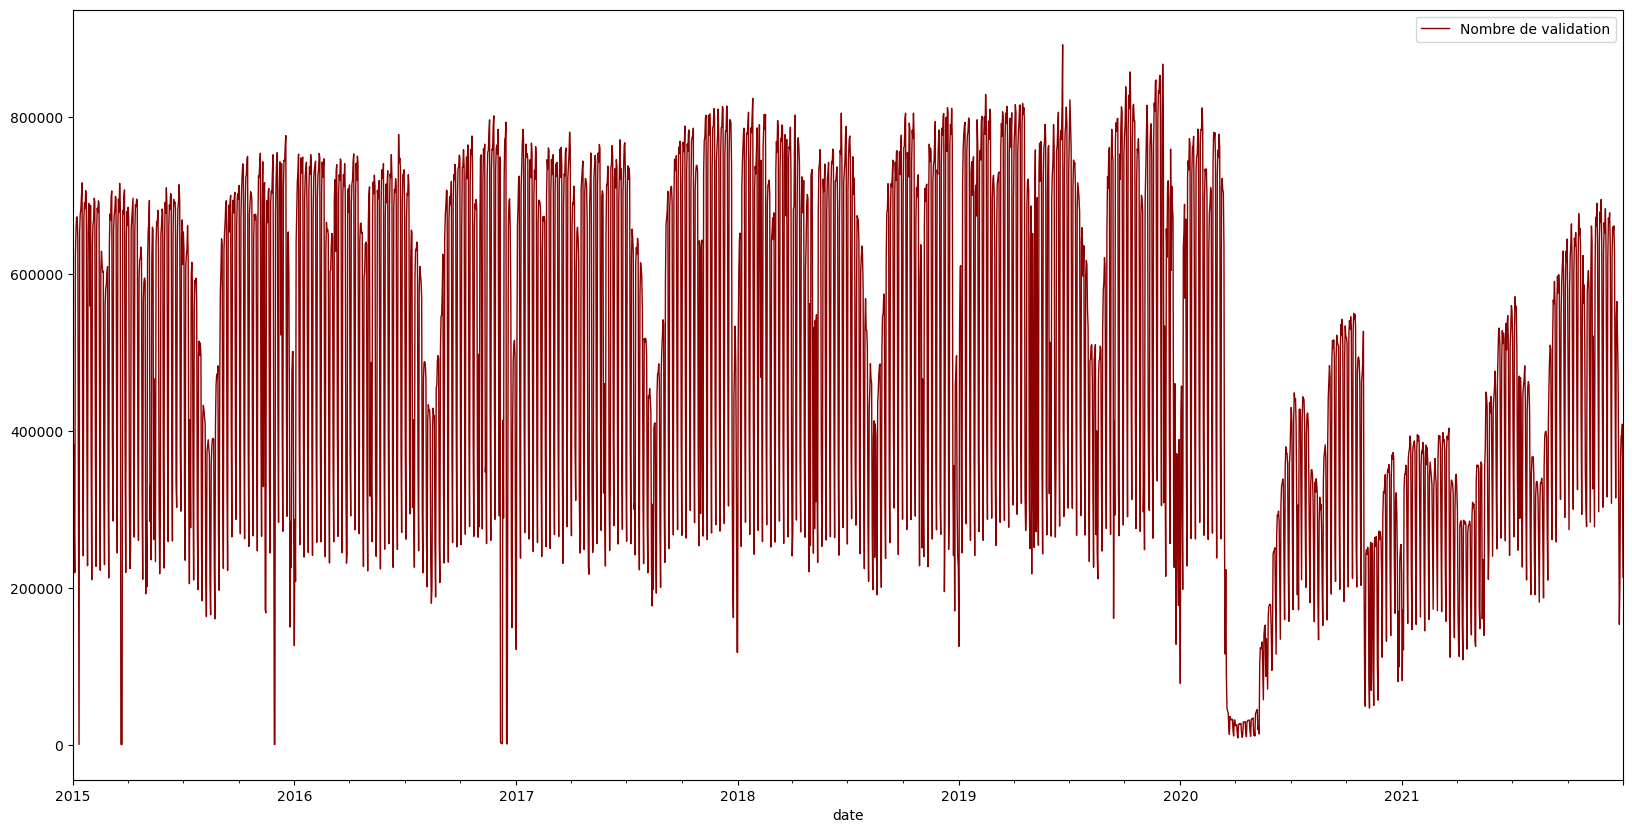

In [7]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)
plt.legend()
plt.show()

Un autre détail attire notre attention. En effet, nous pouvons observer qu'au cours de chaque seconde moitié de l'année, il existe une période marquée par une baisse significative du nombre de validations. Pour étudier cela de plus près, nous allons nous concentrer sur le nombre de validations par mois plutôt que par jour.

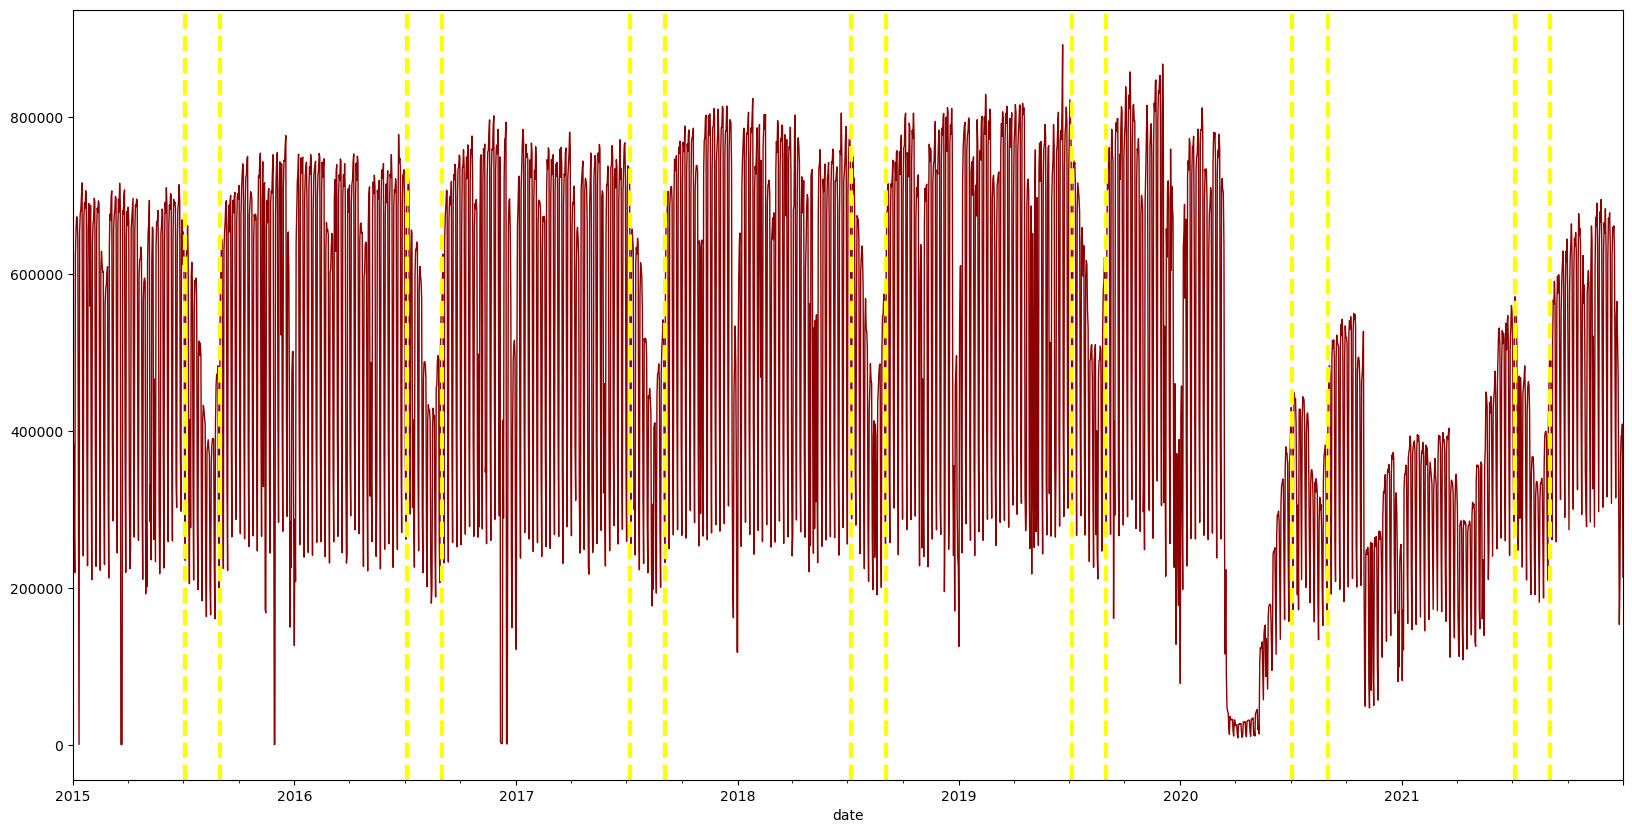

In [8]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)

# Grandes Vacances
plt.axvline(x="2015-07-04", color="yellow", lw=3, ls="--")
plt.axvline(x="2015-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2016-07-05", color="yellow", lw=3, ls="--")
plt.axvline(x="2016-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2017-07-08", color="yellow", lw=3, ls="--")
plt.axvline(x="2017-09-03", color="yellow", lw=3, ls="--")

plt.axvline(x="2018-07-07", color="yellow", lw=3, ls="--")
plt.axvline(x="2018-09-02", color="yellow", lw=3, ls="--")

plt.axvline(x="2019-07-06", color="yellow", lw=3, ls="--")
plt.axvline(x="2019-09-01", color="yellow", lw=3, ls="--")

plt.axvline(x="2020-07-04", color="yellow", lw=3, ls="--")
plt.axvline(x="2020-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2021-07-06", color="yellow", lw=3, ls="--")
plt.axvline(x="2021-09-01", color="yellow", lw=3, ls="--")

#plt.legend()
plt.savefig('Affluence vs Vacances Ete.pdf', dpi=1000, bbox_inches='tight')
plt.show()

En excluant l'année exceptionnelle 2020, nous observons que pendant les périodes des **grandes vacances**, le nombre de validations connaît une baisse significative. Cela semble cohérent, car pendant les grandes vacances, de nombreux Franciliens quittent Paris pour des destinations en dehors de la région.

<h4><font size=4> 1.3.3 Affluence vs Typologie du Jour <a name="Metro_vs_TypeJour"></a></h4>

Une autre information importante que nous souhaitons mettre en évidence concerne le nombre de validations en fonction du type de jour.

<Figure size 1000x500 with 0 Axes>

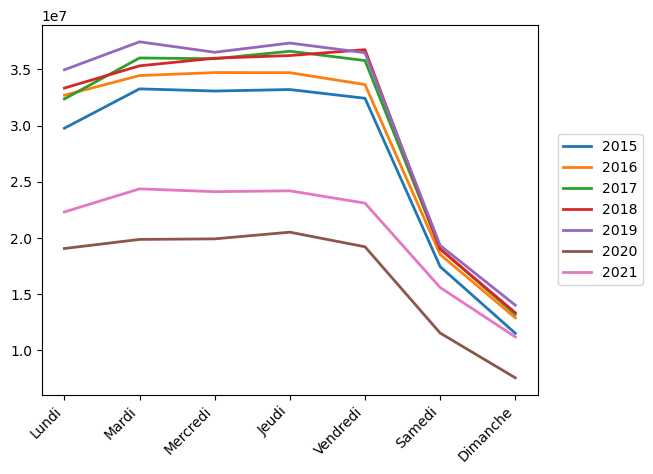

In [9]:
df_typo_jours = pd.read_csv("Bases/Base_Type_jours.csv", sep=",")
liste_annee = [2015+k for k in range(0,7)]

plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1)

X_plot = dict()
Y_plot = dict()
for annee in liste_annee :
    df_temp = df_typo_jours[(df_typo_jours['annee'] == annee)]
    X_plot[str(annee)] = df_temp["type_jour"].to_list()
    Y_plot[str(annee)] = df_temp["nb_validation"].to_list()

for annee in liste_annee :
    ax.plot(X_plot[str(annee)], Y_plot[str(annee)], label=str(annee), linewidth=2)
    plt.xticks(rotation=45, ha="right")
    ax.legend(fontsize=10, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    #ax.set_title("Nombre de validation par typologie de jour")
    
plt.savefig('Affluence vs Typologique de Jours.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous remarquons clairement que le nombre de validations est significativement plus bas le week-end, notamment le dimanche, par rapport aux autres jours de la semaine.

<h2><font size=6> 2. Construction des modèles <a name="Construction"></a></h2>

Maintenant que nous avons effectué une analyse préliminaire de nos données, il est temps de répondre à notre problématique. Pour cela, nous allons commencer par préparer nos données avant de construire nos modèles de prédiction.

<h3><font size=5> 2.1. Préparation des données <a name="PréparationDonnées"></a></h3>

La préparation des données est essentielle pour garantir la pertinence du modèle, notamment dans le cas des séries temporelles. Cette étape est nécessaire pour plusieurs raisons. Tout d'abord, les données brutes peuvent comporter des erreurs, des incohérences, des valeurs manquantes ou des doublons, qui peuvent compromettre les résultats de l'analyse. La préparation des données consiste à les nettoyer, les normaliser et les organiser de manière à garantir leur validité et leur fiabilité.

Ensuite, les données peuvent présenter différentes formes et types, rendant leur analyse difficile voire impossible. Il est donc nécessaire de les transformer afin de les rendre compatibles avec les outils et les méthodes statistiques utilisés. Cela peut impliquer la transformation de variables, la gestion des variables catégorielles ou encore la création de nouvelles caractéristiques à partir des données existantes.

Enfin, la préparation des données permet de s'assurer de l'indépendance des variables et de la distribution normale des variables cibles. Cette conformité est importante pour l'application de certaines techniques statistiques qui requièrent des conditions spécifiques pour être efficaces.

En résumé, la préparation des données est une étape cruciale pour garantir la qualité et la pertinence du modèle. Elle implique le nettoyage, la transformation et l'organisation des données afin de les rendre valides, compatibles et conformes aux exigences des techniques statistiques utilisées.

<h4><font size=4> 2.1.1. Retraitement des données <a name="RetraitementDonnees"></a></h4>

Regardons les données que nous avons :

In [10]:
data.drop(['type_jour', 'type_mois'], axis=1, inplace=True)
#data.fillna('Aucun', inplace=True)
data.tail(2)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2021-12-30,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,409121,3,12,2021
2021-12-31,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,214174,4,12,2021


La principale différence entre les données supervisées classiques et celles issues d'une série temporelle réside dans leur **dépendance temporelle**. En effet, dans une série temporelle, les observations futures dépendent des observations passées. Ainsi, il est essentiel de conserver les données passées pour pouvoir effectuer des prédictions futures. Pour ce faire, nous avons créé une fonction appelée **series_to_supervised** qui transforme une série temporelle en données supervisées.

Cette fonction est également dotée d'un paramètre supplémentaire, appelé *historique*, qui permet de définir la fenêtre temporelle que nous souhaitons utiliser pour prédire notre variable cible. Par exemple, si l'argument "historique" est défini à 1, nous utiliserons les données au temps t-1 pour prédire la valeur au temps t. Si "historique" est défini à 3, nous utiliserons les données aux temps t-1, t-2 et t-3 pour prédire la valeur au temps t.

Par ailleurs, nos modèles fonctionnent généralement mieux avec des données normalisées. C'est pourquoi la fonction prend également en charge la normalisation des données, en veillant à ce qu'elles soient toutes de type flottant (float) pour faciliter les calculs et les traitements ultérieurs.

In [11]:
data.head()

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2015-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,124174,3,1,2015
2015-01-02,Aucun,Aucun,Faible,Noël,Aucun,Aucun,383734,4,1,2015
2015-01-03,Aucun,Aucun,Faible,Noël,Aucun,Aucun,284976,5,1,2015
2015-01-04,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,219823,6,1,2015
2015-01-05,Aucun,Aucun,Aucun,Aucun,Aucun,Aucun,623614,0,1,2015


In [12]:
min_max_scaler = MinMaxScaler((0,1))
label_encoder = LabelEncoder()

def series_to_supervised(data, historique) :   
    df = data.copy()
    
    for col in ['ferie', 'fete', 'greve', 'vacance', 'confinement', 'couvre_feu', 'annee'] :
        df[col] = label_encoder.fit_transform(df[col]) # on encode toutes nos variables catégorielles

    df = df.astype('float32') # nous voulons que des floatants

    columns_data = list(df.columns) # on récupère la liste de nos variables
    for hist in range(1,historique+1) :
        for col_name in columns_data :
            df[col_name+"(t-"+str(hist)+")"] = df[col_name].shift(hist) # nous ajoutons l'historique de chacune de nos variables
        
    #df.fillna(0.0, inplace=True)
    return df

Afin de respecter les tendances hebdomadaires, nous choisissons d'avoir une fenêtre d'historique de 1 an. Ayons choisi une telle fenêtre d'historique, nous devons ne pas considérer les données de la première année vu que nous n'aurons pas tout l'historique.

In [13]:
historique = 365*1
data_supervised_true = series_to_supervised(data=data, historique=historique)
data_supervised_true = data_supervised_true[historique:].drop(['ferie','fete', 'greve', 'vacance',
                                                               'confinement','couvre_feu',
                                                               'num_jour','num_mois','annee'], axis=1)

Voyons ce que nous obtenons :

In [14]:
data_supervised_true.head(3)

,nb_validation,ferie(t-1),fete(t-1),greve(t-1),vacance(t-1),confinement(t-1),couvre_feu(t-1),nb_validation(t-1),num_jour(t-1),num_mois(t-1),annee(t-1),ferie(t-2),fete(t-2),greve(t-2),vacance(t-2),confinement(t-2),couvre_feu(t-2),nb_validation(t-2),num_jour(t-2),num_mois(t-2),annee(t-2),ferie(t-3),fete(t-3),greve(t-3),vacance(t-3),confinement(t-3),couvre_feu(t-3),nb_validation(t-3),num_jour(t-3),num_mois(t-3),annee(t-3),ferie(t-4),fete(t-4),greve(t-4),vacance(t-4),confinement(t-4),couvre_feu(t-4),nb_validation(t-4),num_jour(t-4),num_mois(t-4),annee(t-4),ferie(t-5),fete(t-5),greve(t-5),vacance(t-5),confinement(t-5),couvre_feu(t-5),nb_validation(t-5),num_jour(t-5),num_mois(t-5),annee(t-5),ferie(t-6),fete(t-6),greve(t-6),vacance(t-6),confinement(t-6),couvre_feu(t-6),nb_validation(t-6),num_jour(t-6),num_mois(t-6),annee(t-6),ferie(t-7),fete(t-7),greve(t-7),vacance(t-7),confinement(t-7),couvre_feu(t-7),nb_validation(t-7),num_jour(t-7),num_mois(t-7),annee(t-7),ferie(t-8),fete(t-8),greve(t-8),vacance(t-8),confinement(t-8),couvre_feu(t-8),nb_validation(t-8),num_jour(t-8),num_mois(t-8),annee(t-8),ferie(t-9),fete(t-9),greve(t-9),vacance(t-9),confinement(t-9),couvre_feu(t-9),nb_validation(t-9),num_jour(t-9),num_mois(t-9),annee(t-9),ferie(t-10),fete(t-10),greve(t-10),vacance(t-10),confinement(t-10),couvre_feu(t-10),nb_validation(t-10),num_jour(t-10),num_mois(t-10),annee(t-10),ferie(t-11),fete(t-11),greve(t-11),vacance(t-11),confinement(t-11),couvre_feu(t-11),nb_validation(t-11),num_jour(t-11),num_mois(t-11),annee(t-11),ferie(t-12),fete(t-12),greve(t-12),vacance(t-12),confinement(t-12),couvre_feu(t-12),nb_validation(t-12),num_jour(t-12),num_mois(t-12),annee(t-12),ferie(t-13),fete(t-13),greve(t-13),vacance(t-13),confinement(t-13),couvre_feu(t-13),nb_validation(t-13),num_jour(t-13),num_mois(t-13),annee(t-13),ferie(t-14),fete(t-14),greve(t-14),vacance(t-14),confinement(t-14),couvre_feu(t-14),nb_validation(t-14),num_jour(t-14),num_mois(t-14),annee(t-14),ferie(t-15),fete(t-15),greve(t-15),vacance(t-15),confinement(t-15),couvre_feu(t-15),nb_validation(t-15),num_jour(t-15),num_mois(t-15),annee(t-15),ferie(t-16),fete(t-16),greve(t-16),vacance(t-16),confinement(t-16),couvre_feu(t-16),nb_validation(t-16),num_jour(t-16),num_mois(t-16),annee(t-16),ferie(t-17),fete(t-17),greve(t-17),vacance(t-17),confinement(t-17),couvre_feu(t-17),nb_validation(t-17),num_jour(t-17),num_mois(t-17),annee(t-17),ferie(t-18),fete(t-18),greve(t-18),vacance(t-18),confinement(t-18),couvre_feu(t-18),nb_validation(t-18),num_jour(t-18),num_mois(t-18),annee(t-18),ferie(t-19),fete(t-19),greve(t-19),vacance(t-19),confinement(t-19),couvre_feu(t-19),nb_validation(t-19),num_jour(t-19),num_mois(t-19),annee(t-19),ferie(t-20),fete(t-20),greve(t-20),vacance(t-20),confinement(t-20),couvre_feu(t-20),nb_validation(t-20),num_jour(t-20),num_mois(t-20),annee(t-20),ferie(t-21),fete(t-21),greve(t-21),vacance(t-21),confinement(t-21),couvre_feu(t-21),nb_validation(t-21),num_jour(t-21),num_mois(t-21),annee(t-21),ferie(t-22),fete(t-22),greve(t-22),vacance(t-22),confinement(t-22),couvre_feu(t-22),nb_validation(t-22),num_jour(t-22),num_mois(t-22),annee(t-22),ferie(t-23),fete(t-23),greve(t-23),vacance(t-23),confinement(t-23),couvre_feu(t-23),nb_validation(t-23),num_jour(t-23),num_mois(t-23),annee(t-23),ferie(t-24),fete(t-24),greve(t-24),vacance(t-24),confinement(t-24),couvre_feu(t-24),nb_validation(t-24),num_jour(t-24),num_mois(t-24),annee(t-24),ferie(t-25),fete(t-25),greve(t-25),vacance(t-25),confinement(t-25),couvre_feu(t-25),nb_validation(t-25),num_jour(t-25),num_mois(t-25),...,ferie(t-341),fete(t-341),greve(t-341),vacance(t-341),confinement(t-341),couvre_feu(t-341),nb_validation(t-341),num_jour(t-341),num_mois(t-341),annee(t-341),ferie(t-342),fete(t-342),greve(t-342),vacance(t-342),confinement(t-342),couvre_feu(t-342),nb_validation(t-342),num_jour(t-342),num_mois(t-342),annee(t-342),ferie(t-343),fete(t-343),greve(t-343),vacance(t-343),confinement(t-343),couvre_feu(t-343),nb_validation(t-343),num_jour(t

Nous allons maintenant normaliser nos données. En effet, les modèles de prédiction que nous allons construire sont beaucoup plus sensibles à des données normalisées.

In [15]:
data_supervised = np.array(data_supervised_true)
data_supervised = min_max_scaler.fit_transform(data_supervised)

Il est également important de garder nos valeurs réelles pour valider nos prédictions.

In [16]:
df_true = data[historique:]

In [17]:
df_true.head(3)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2016-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,126821,4,1,2016
2016-01-02,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,287756,5,1,2016
2016-01-03,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,208455,6,1,2016


<h4><font size=4> 2.1.2. Séparation des données d'apprentissage et des données test <a name="Train_Test_Split"></a></h4>

Maintenant que nous avons une fonction qui nous permet d'utiliser nos données proprement, nous devons séparer nos données en données d'apprentissage et données de test. 

Pour cela, nous allons définir une autre fonction **data_test_supervised** qui permet à partir de données supervisées (*data*), d'une fenêtre d'historique (*historique*), d'une date de départ (*test_start*) et d'une date de fin (*test_end*), de construire des données de test qui commenceront de *test_start* à *test_end*. Nous voulons également nous positionner en conditions réelles, c'est pourquoi toutes les données concernant le nombre de validation antérieurs à cette date seront remplacées par le floatant $0.0$. 

Voici un exemple pour clarifier le fonctionnement de la fonction **data_test_supervised**. Supposons que nous sommes le 1er Janvier 2020, que nous avons une fenêtre d'historique de  365 jours et que nous voulons prédire le nombre de validation du 4 Janvier. Etant le 1er Janvier, nous n'avons pas les données de validation des 2 et 3 Janvier, qui correspondent aux données à *t-1* et *t-2*. La fonction **data_test_supervised** remplacera donc ces valeurs par le $0.0$.

Nous utiliserons cette fonction pour créer notre ensemble de données de test, qui couvrira la période du 1er janvier au 31 décembre 2021.

Il est également utile d'avoir des données de validation qui nous permettrons de choisir un bon modèle de prédiction, notamment lorsque nous tunerons les hyper-paramètres. 

Pour obtenir des données de validation, nous allons utiliser la même approche que pour les données de test. Cependant, cette fois-ci, nous allons créer un ensemble de données de validation qui couvre la période du 1er janvier 2019 au 31 décembre 2019.

Pour ce qui est de données d'apprentissage, pour notre prédiction finale sur nos de données de test, nous prendrons comme données d'apprentissage nos données du 1er Janvier 2015 au 31 Décembre 2019. 

En revanche, pour tuner nos hyper-paramètres, nous ferons des prédicitons sur nos données de validaitons. Ainsi, nous prendrons comme données d'apprentissage nos données du 1er Janvier 2015 au 30 Juin 2018.

Récapitulons nos différents données : 
- **toutes nos données** : du 1er Janvier 2015 au 31 Décembre 2021
- **données de test** : du 1er Janvier 2020 au 31 Décembre 2021
- **données de validation** : du 1er Juillet 2018 au 31 Décembre 2019
- **données d'apprentissage** :
    - du 1er Janvier 2015 au 30 Juin 2018 d'une part;
    - du 1er Janvier 2015 au 31 Décembre 2019 d'autre part

In [18]:
def data_test_supervised(data=data_supervised_true, historique=historique, test_start='2020-01-01', test_end='2021-12-31') : 
    #col_names = ['ferie', 'fete', 'greve', 'vacance', 'confinement', 'couvre_feu', 'num_jour', 'num_mois', 'annee']
    df_test = data.loc[test_start:test_end,:] # on récupère sur la période que l'on veut
    
    # on se place en conditions réelles pour les données du futur de moins de 365 jours
    for i in range(1,historique+1) :
        index_temp = df_test.index[0] + timedelta(i)
        if index_temp in list(data.index) :
            for j in range(1,i+1) :
                df_test.loc[index_temp, "nb_validation(t-"+str(j)+")"] = 0.0

    # on se place en conditions réelles pour les données du futur de plus de 365 jours
    for j in range(1,historique+1) :
        index_temp = df_test.index[0] + timedelta(j)
        if index_temp in list(data.index) :
            df_test.loc[index_temp:, "nb_validation(t-"+str(j)+")"] = 0.0
    
    return df_test

In [19]:
data_test = data_test_supervised(test_start='2020-01-01', test_end='2021-12-31')
data_test = min_max_scaler.fit_transform(np.array(data_test))
test_start = data_test.shape[0]
data_train = data_supervised[:-test_start,:]

data_val = data_test_supervised(test_start='2018-07-01', test_end='2019-12-31')
data_val = min_max_scaler.fit_transform(np.array(data_val))
val_start = data_val.shape[0]
data_train2 = data_train[:-val_start,:]

Il faut également que nous séparions les variables explicatives et la variable à expliquer (ici le nombre de validation). 

In [20]:
X_train, y_train = data_train[:,1:], data_train[:,0]
X_test, y_test = data_test[:,1:], data_test[:,0]

X_train2, y_train2 = data_train2[:,1:], data_train2[:,0]
X_val, y_val = data_val[:,1:], data_val[:,0]

print(X_train.shape, X_train2.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_train2.shape, y_test.shape, y_val.shape)

(1461, 3650) (912, 3650) (731, 3650) (549, 3650)
(1461,) (912,) (731,) (549,)


Maintenant que nous avons préparé nos données, nous allons définir les différentes étapes par lesquelles nous allons passer pour construire nos modèles de prédiction.

<h4><font size=4> 2.1.3. Etape de construction des modèles <a name="Construction_Modèle"></a></h4>

Les étapes que nous suivrons pour **TOUS** nos modèles sont les suivantes :

1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèles sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test

<h3><font size=5> 2.2. Un peu de Régression Linéaire : Le modèle Ridge <a name="Ridge"></a></h3>

<h4><font size=4> 2.2.1. Principe <a name="Principe_Ridge"></a></h4>

La régression Ridge est l’une des méthodes de **pénalisation** les plus intuitives. Elle s’utilise pour limiter l’instabilité des prédictions liée à des variables explicatives trop corrélées entre elles.
Cette fonction de pénalisation se base sur la norme dite L2 qui correspond à la distance euclidienne. 

</br>
</br>
<img src="images/ridge.png" width="700" height="640">
</br>
</br>

Autrement dit, la pénalisation Ridge va diminuer la distance entre les solutions possibles, sur la base de la mesure euclidienne.

</br>

**Réglage du paramètre lambda :**

    ▪ Quand lambda est proche de zéro, on s’approche de la solution classique, non pénalisée.

    ▪ Quand lambda est infini, la pénalisation est telle que tous les paramètres sont nuls.

    ▪ En augmentant lambda, on augmente le biais de la solution, mais on diminue la variance (on parle de compromis biais-variance).

</br>

Tout comme la régression linéaire classique, la régression ridge peut être résolue par descente de gradient en itérant jusqu’à convergence pour la fonction de coût C.

La régression Ridge permet en d'autres termes de contourner les problèmes de colinéarité (variables explicatives très fortement corrélées entre elles) dans un contexte où le nombre de variables explicatives en entrée du problème est élevé.

La principale faiblesse de cette méthode est liée aux difficultés d’interprétation car, sans sélection, toutes les variables sont concernées dans le modèle.

En résumé, la régression Ridge utilise la pénalisation de la norme L2 pour régulariser le modèle et réduire les effets indésirables de la corrélation entre les variables explicatives. Cela permet d'améliorer la stabilité des prédictions et d'obtenir des coefficients de modèle plus équilibrés.

<h4><font size=4> 2.2.2. Construction du modèle <a name="Construction_Ridge"></a></h4>

Afin de créer un modèle performant,, il faut optimiser ses **hyperparamètres** autant que nous le pouvons. Pour un modèle Ridge, le seul hyperparamètre que nous pouvons optimiser est le critère **lambda**. Voyons voir comment nous pouvons l'optimiser. 

<h5><font size=3> 2.2.2.a. Entraînement du modèle Ridge <a name="Train_Ridge"></a></h5>

Tout d'abord, nous allons définir une liste de potentiel **lambda**.

In [21]:
liste_lambda_ridge = [k/2 for k in range(1,19)]
liste_fit_intercept = [True, False]

Ensuite, nous allons entraîner notre modèle en utilisant les données d'entraînement pour chaque valeur de **lambda** définie dans notre liste. Nous allons prédire la variable *nb_validation* sur les données de validation et choisir le meilleur lambda en fonction de la métrique de **mean_squared_error**. Le lambda choisi sera celui qui donne la plus petite valeur de **mean_squared_error** sur les données de validation.

Cependant, si nous prédisons la variable *nb_validation* d'un coup, nous allons rencontrer un problème. En effet, nous allons inélucablement utiliser des données futures (les données à t-1, t-2, ..., t-14) pour prédire le futur (les données à t). Mais en conditions réelles, nous n'avons pas les données futures. Nous devons utiliser les prédictions des instants t-1, t-2, ..., t-14 pour prédire l'instant t. Nous allons faire en sorte d'être en conditions réelles. 

Pour cela, nous allons définir deux fonctions :
- **prediction_one_day** : Cette fonction permet de déterminer le nombre de validation du jour suivant à partir d'un modèle donné.
- **prediction_futur** :  Cette fonction permet de déterminer le nombre de validation de données test à partir d'un modèle donné et de données prédites historisées.

Ces deux fonctions nous permettent de prendre en compte la dépendance temporelle des données et de réaliser des prédictions plus cohérentes avec les conditions réelles.

In [22]:
def prediction_one_day(model, testX) :
    predy = model.predict(testX)
    return predy[0]

def prediction_futur(model, testX, hist=historique) :
    testX_temp = testX.copy()
    
    predy_futur = []
    while len(testX_temp) != 0 :
        pred_temp = prediction_one_day(model, testX_temp[0:1])
        predy_futur.append(pred_temp)
        testX_temp = testX_temp[1:]
        if len(testX_temp) != 0 :
            for i in range(hist) :
                if len(predy_futur) > i :
                    if  len(testX_temp.shape) == 3 :
                        testX_temp[0,i,6] = predy_futur[-(1+i)][0]
                    else :
                        testX_temp[0,6+10*i] = predy_futur[-(1+i)]
        
    return np.array(predy_futur)

Revenons à l'optimisation de notre modèle Ridge !

Pour cela, nous allons utiliser les deux fonctions que nous avons définies précédemment pour prédire la variable *nb_validation* sur nos données de validation en essayant toutes les combinaisons de la liste des **lambda**.

Une fois les prédictions effectuées, nous devrons inverser le processus de normalisation des données pour obtenir les véritables prédictions. Cela nous permettra d'avoir des prédictions dans l'échelle d'origine de nos données.

In [25]:
dict_ridge = {'lambda': [], 
              'fit_intercept': [],
             'mse_train': [],
             'mse_val': []}

start_time = time.time()
for lambda_ridge in liste_lambda_ridge :
    for fit_intercept in liste_fit_intercept :
        rid = Ridge(lambda_ridge, fit_intercept=fit_intercept)
        rid.fit(X_train2, y_train2)

        y_pred_val = prediction_futur(rid, X_val)
        y_pred_train = prediction_futur(rid, X_train2)

        mse_train = mean_squared_error(y_train2, y_pred_train)
        mse_val = mean_squared_error(y_val, y_pred_val)

        dict_ridge['lambda'].append(str(lambda_ridge))
        dict_ridge['fit_intercept'].append(str(fit_intercept))
        dict_ridge['mse_train'].append(mse_train)
        dict_ridge['mse_val'].append(mse_val)

print(f'time excution : {time.time() - start_time}')

time excution : 22.471734046936035


In [26]:
results_ridge = pd.DataFrame(dict_ridge)
results_ridge = results_ridge.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['lambda', 'fit_intercept'])
results_ridge.head()

,,mse_train,mse_val
lambda,fit_intercept,,
9.0,True,0.001877,0.021614
8.5,True,0.001791,0.021720
8.0,True,0.001703,0.021835
7.5,True,0.001612,0.021961
7.0,True,0.001518,0.022099


Nous choisissons maintenant le meilleur **lambda** de notre liste :

In [36]:
lambda_ridge = float(results_ridge.index[0][0])
fit_intercept = bool(results_ridge.index[0][1])
print(f'lambda ridge : {lambda_ridge}')
print(f'fit_intercept: {fit_intercept}')

lambda ridge : 9.0
fit_intercept: True


<h5><font size=3> 2.2.2.b. Prédiction du modèle Ridge <a name="Test_Ridge"></a></h5>

Maintenant, nous allons effectuer des prédictions sur nos données de test en utilisant notre meilleur modèle.

In [37]:
rid = Ridge(lambda_ridge, fit_intercept=fit_intercept)
rid.fit(X_train, y_train)

y_pred_test = prediction_futur(rid, X_test)
y_pred_train = prediction_futur(rid, X_train)

# Valeurs prédites
X_pred_test_rid = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_rid = min_max_scaler.inverse_transform(X_pred_test_rid)

X_pred_train_rid = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_rid = min_max_scaler.inverse_transform(X_pred_train_rid)

X_plot_rid = np.concatenate((X_pred_train_rid[:,0],X_pred_test_rid[:,0]), axis=0)
df_true.loc[:,'y_pred_rid'] = X_plot_rid

Voyons maintenant ce que nous obtenons graphiquement.

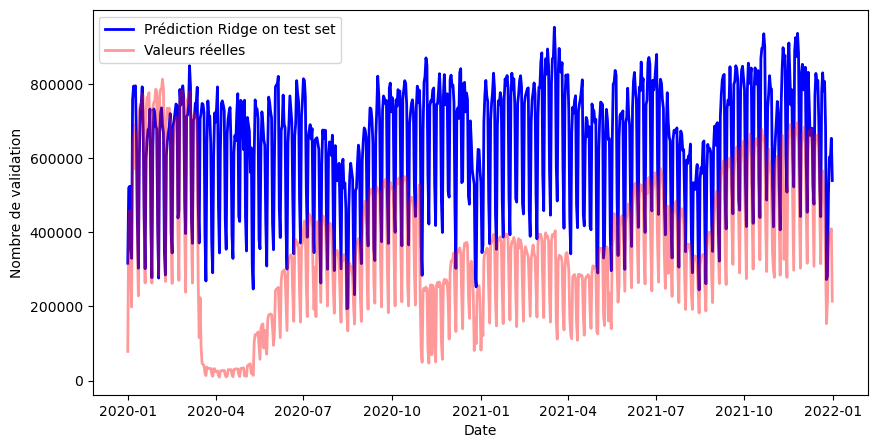

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid'], color="blue", label="Prédiction Ridge on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prediction Ridge sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous remarquons que les saisonnalités hebdomadaires semblent être respectées. En effet, nous pouvons constater que le nombre de validations diminue pendant les week-ends et augmente les lundis, ce qui est conforme aux données réelles.

Cependant nous ne pouvons pas en dire autant des autres saisonnalités. Nous soulignons que pendant la période des grandes vacances de 2019 (Juillet et Août 2019), une importante baisse du nombre de validation devrait être relevé ce qui n'est pas le cas. 

Nous concluons donc que ce modèle est plutôt moyen.

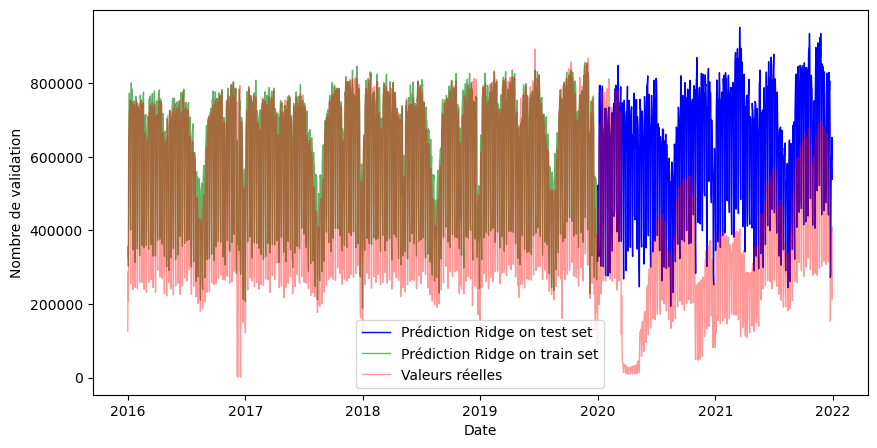

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid'], color="blue", label="Prédiction Ridge on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_rid'], color="green", alpha=0.6, label="Prédiction Ridge on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend(fontsize=10)

plt.savefig('Prédiction Ridge.pdf', dpi=1000, bbox_inches='tight')
plt.show()


Les données en vert représentent les prédictions du modèle Ridge effectuées sur les données d'entraînement, tandis que les données en bleu correspondent aux prédictions sur les données de test. Les données en rouge représentent les valeurs réelles.

Nous observons que le modèle Ridge semble mieux s'ajuster aux données d'entraînement, ce qui suggère la présence d'un surapprentissage.

Passons maintenant à la construction d'un autre modèle : un modèle Random Forest.

<h3><font size=5> 2.3. Un peu de Bagging : Le modèle Random Forest <a name="RandomForest"></a></h3>

<h4><font size=4> 2.3.1. Principe <a name="Principe_RandomForest"></a></h4>

Un **Random Forest** (Forêt d'arbres de décision) est une technique qui fait partie des **méthodes d'ensemble**.<br>
Elle combine :<br>
- **Les arbres de décision**<br>
- **Le Bagging**<br>

*Le principe* : Au lieu d'entrainer un seul arbre de décision, nous allons entrainer plusieurs arbres **différents** (constitués de sous-ensembles d'individus et de variables séléctionnés aléatoirement) de telle sorte à réduire la corréaltion entre les arbres. Le **résultat final** est obtenu par **moyenne** des résultats de tous les arbres de décision.<br>

C’est l’assemblage de tous ces arbres ("**weak learners**") qui rend extrêmement performante la prédiction.
<img src="images/random_forest.jpeg" width=600 height="400"/>

<h4><font size=4> 2.3.2. Construction du modèle <a name="Construction_RandomForest"></a></h4>

Nous allons réitérer les mêmes étapes que pour le modèle précédent. Rappelons les étapes :
1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèle sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test.

<h5><font size=3> 2.3.2.a. Entraînement du modèle RandomForest <a name="Train_RandomForest"></a></h5>

Il y a beaucoup plus d'**hyperparamètres** pour un modèle RandomForest qu'un modèle Ridge, nous allons donc optimiser plus d'hyperparamètres (pas tous car il y en a quand même beaucoup).

Voici la liste des hyperparamètres que nous allons tester :<br>
- **max_depth**<br>
- **min_samples_split**<br>
- **min_samples_leaf**

Le paramètre **max_depth** de Random Forest définit la **profondeur maximale** des arbres de décision dans l'ensemble. Plus la profondeur des arbres est grande, plus le modèle peut être complexe et mieux il peut s'adapter aux données, mais cela augmente également le risque de surapprentissage. Un modèle qui surapprend les données de formation peut ne pas généraliser correctement aux nouvelles données et ainsi avoir de moins bonnes performances sur l'ensemble de test ou sur des données en production.  
Ainsi **max_depth** peut être utilisé pour contrôler la complexité du modèle en limitant la profondeur des arbres. Une valeur plus petite signifie que les arbres seront plus simples et que le modèle sera moins complexe. Cela peut aider à prévenir le **surapprentissage** et à améliorer la généralisation du modèle.

Le paramètre **min_samples_split** de Random Forest détermine le **nombre minimal d'échantillons** requis pour effectuer un **split** sur un noeud de l'arbre de décision. Plus précisément, si un noeud contient moins d'échantillons que la valeur de **min_samples_split**, l'algorithme ne tentera pas de splitter ce noeud et le noeud sera considéré comme une feuille de l'arbre de décision.

Le paramètre **min_samples_leaf** de Random Forest détermine le nombre minimal d'échantillons requis pour être considéré comme une feuille de l'arbre de décision. Plus précisément, si un noeud de l'arbre de décision contient moins d'échantillons que la valeur de **min_samples_leaf**, l'algorithme considérera ce noeud comme une feuille de l'arbre de décision, même s'il peut être splitté en utilisant la fonction de coût (comme l'entropie ou l'erreur quadratique moyenne).

In [40]:
liste_max_depth = [k for k in range(8,15)]
liste_min_samples_split = [k for k in range(2,7,1)]
liste_min_samples_leaf = [k for k in range(1,5,1)]

In [41]:
print(f'liste_max_depth : {liste_max_depth}')
print(f'liste_min_samples_split : {liste_min_samples_split}')
print(f'liste_min_samples_leaf : {liste_min_samples_leaf}')

liste_max_depth : [8, 9, 10, 11, 12, 13, 14]
liste_min_samples_split : [2, 3, 4, 5, 6]
liste_min_samples_leaf : [1, 2, 3, 4]


In [43]:
dict_rf = {'max_depth': [],
              'min_samples_split': [],
              'min_samples_leaf': [],
              'mse_train': [],
              'mse_val': []}

start_time = time.time()
k = 1
for max_depth in liste_max_depth :
    for min_samples_split in liste_min_samples_split :
        for min_samples_leaf in liste_min_samples_leaf :
            #print(k)
            rf = RandomForestRegressor(max_features='log2', 
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split,
                                          min_samples_leaf=min_samples_leaf, 
                                       criterion='friedman_mse')
                
            rf.fit(X_train2, y_train2)
            y_pred_val = prediction_futur(rf, X_val)
            y_pred_train = prediction_futur(rf, X_train2)

            mse_train = mean_squared_error(y_train2, y_pred_train)
            mse_val = mean_squared_error(y_val, y_pred_val)
                
            dict_rf['max_depth'].append(max_depth)
            dict_rf['min_samples_split'].append(min_samples_split)
            dict_rf['min_samples_leaf'].append(min_samples_leaf)
            dict_rf['mse_train'].append(np.mean(mse_train))
            dict_rf['mse_val'].append(np.mean(mse_val))
            k += 1
                
print(f'time excution : {time.time() - start_time}')

time excution : 1362.1041331291199


In [44]:
results_rf = pd.DataFrame(dict_rf)
results_rf = results_rf.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['max_depth', 'min_samples_split', 'min_samples_leaf'])
results_rf.head()

,,,mse_train,mse_val
max_depth,min_samples_split,min_samples_leaf,,
12,4,1,0.004488,0.018139
11,5,1,0.004836,0.018444
12,3,1,0.004100,0.018485
9,6,1,0.006258,0.018507
10,2,1,0.004477,0.018524


Regardons les meilleurs hyperparamètres que nous avons !

In [45]:
max_depth = results_rf.index[0][0]
min_samples_split = results_rf.index[0][1]
min_samples_leaf = results_rf.index[0][2]

In [46]:
print(f'max_depth : {max_depth}')
print(f'min_samples_split : {min_samples_split}')
print(f'min_samples_leaf : {min_samples_leaf}')

max_depth : 12
min_samples_split : 4
min_samples_leaf : 1


<h5><font size=3> 2.3.2.b. Prédiction du modèle RandomForest <a name="Test_RandomForest"></a></h5>

Une fois que nous avons nos meilleurs hyperparamètres, nous entraînons notre modèle sur les données d'apprentissage finales et nous prédisons nos données de test.

In [47]:
rf = RandomForestRegressor(max_features='log2',
                          max_depth=max_depth,
                          min_samples_split=min_samples_split,
                          min_samples_leaf=min_samples_leaf, 
                           criterion='friedman_mse')

rf.fit(X_train, y_train)

y_pred_test = prediction_futur(rf, X_test)
y_pred_train = prediction_futur(rf, X_train)

# Valeurs prédites
X_pred_test_rf = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_rf = min_max_scaler.inverse_transform(X_pred_test_rf)

X_pred_train_rf = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_rf = min_max_scaler.inverse_transform(X_pred_train_rf)

X_plot_rf = np.concatenate((X_pred_train_rf[:,0],X_pred_test_rf[:,0]), axis=0)
df_true.loc[:,'y_pred_rf'] = X_plot_rf

Regardons ce que notre prédiction donne:

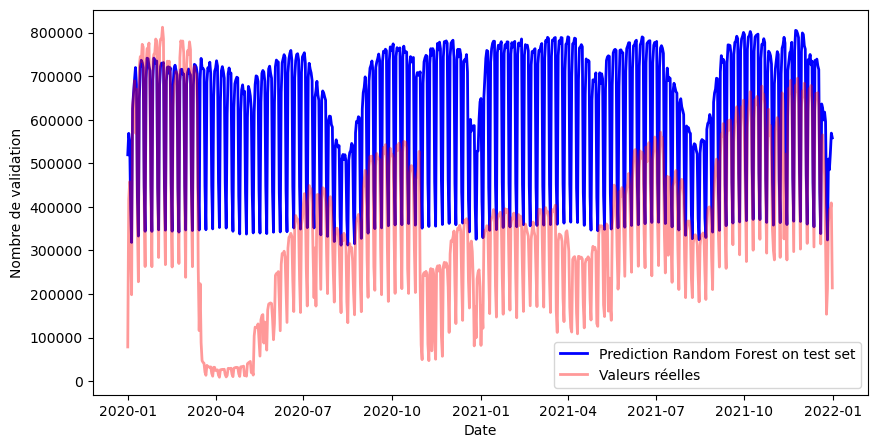

In [48]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf'], color="blue", label="Prediction Random Forest on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Random Forest sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Le modèle Random Forest semble également capturer les schémas de saisonnalité hebdomadaire présents dans les données. De plus, nous avons observé une baisse significative du nombre de validations pendant les grandes vacances, ce qui indique que les schémas de saisonnalité liés aux vacances ont également été pris en compte.

Cependant, il est important de noter que tout comme le modèle Ridge examiné précédemment, le modèle Random Forest n'a pas pris en compte la période de la pandémie de Covid.

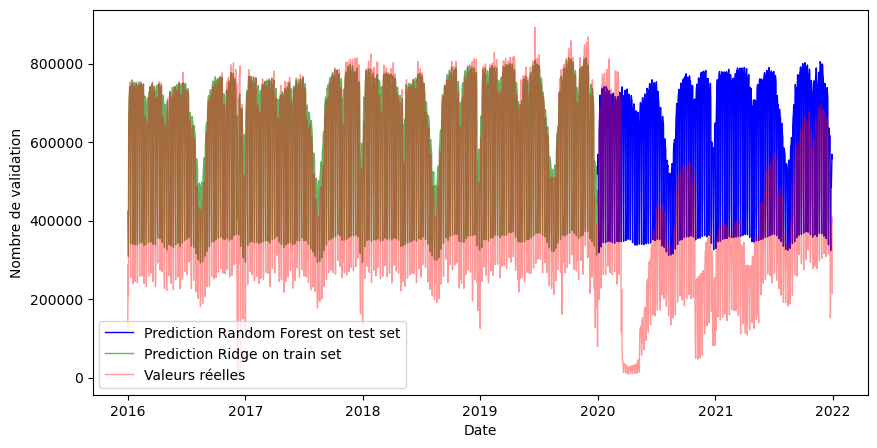

In [49]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf'], color="blue", label="Prediction Random Forest on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_rf'], color="green", alpha=0.6, label="Prediction Ridge on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Random Forest.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Dans ce modèle, nous avons observé un phénomène de sur-apprentissage. Cela signifie que le modèle s'est trop adapté aux données d'entraînement spécifiques et n'a pas généralisé de manière optimale aux nouvelles données.

De plus, nous avons remarqué une limite inférieure apparente pour le nombre de validations, qui se situe autour de 350 000 validations. Que ce soit lors de la prédiction des données d'entraînement ou des données de test, le modèle semble avoir du mal à prédire des valeurs inférieures à cette limite.

<h3><font size=5> 2.4. Un peu de Boosting : Le modèle XGBoost <a name="XGBoost"></a></h3>

<h4><font size=4> 2.4.1. Principe <a name="Principe_XGBoost"></a></h4>

Dans cette partie nous allons voir une autre **méthode d'ensemble** : le **boosting**.<br>
<br>
*Principe* : Cette fois-ci, les algorithmes ne sont plus indépendants comme pour le Random Forest, au contraire, chaque "weak learner" est entrainé pour **corriger les erreurs** du "weak learner" précédent.<br>
Le boosting travaille de manière **séquentielle**.<br><br><br>
<img src="images/boosting.png" width=600 height="400"/>
<br><br><br>
La principale différence entre les différents algorithmes de boosting (par exemple XGboost, Gradient boosting, AdaBoost, ...) est la façon dont ils déterminent les **lacunes** des weak learners.<br>
<br>
Nous avons choisi d'entrainer un modèle **XGBoost**.<br>

XGBoost est l'abréviation de Extreme Gradient Boosting, est une mise en œuvre plus performante de l'algorithme du Gradient Boosting.<br>
Cet algorithme est très puissant car il offre un moyen de régler beaucoup plus hyperparamètres que les modèles de boosting classiques. Il peut donc s'adapter à des données plus variées et répondre à différentes problématiques.

<h4><font size=4> 2.4.2. Construction du modèle <a name="Construction_XGBoost"></a></h4>

Nous allons reproduire les mêmes étapes que pour le modèle Random Forest. Récapitulons les étapes :
1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèles sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test.

<h5><font size=3> 2.4.2.a. Entraînement du modèle XGBoost <a name="Train_XGBoost"></a></h5>

Comme pour le modèle Random Forest, il y a beaucoup de paramètres à optimiser.

Voici la liste des hyperparamètres que nous allons tester :<br>
- **max_depth**<br>
- **subsample**<br>
- **gamma**

Le paramètre **max_depth** de XGBoost définit la **profondeur maximale** des arbres de décision dans l'ensemble d'arbres. Comme nous l'avons soulever précédemment, plus la profondeur des arbres est grande, plus le modèle peut être complexe et mieux il peut s'adapter aux données, mais cela augmente également le risque de surapprentissage.

Le paramètre **subsample** de XGBoost définit le **taux de sous-échantillonnage** des observations à chaque noeud de l'arbre de décision. Plus précisément, lorsque subsample est inférieur à 1.0, XGBoost sélectionne aléatoirement un sous-ensemble des observations à chaque noeud de l'arbre de décision, ce qui peut aider à réduire l'overfitting et à améliorer les performances du modèle.

Par exemple, si **subsample** est défini sur 0.5, XGBoost sélectionnera aléatoirement la moitié des observations à chaque noeud de l'arbre de décision. Cela signifie que chaque arbre de l'ensemble d'arbres sera construit à partir d'un échantillon aléatoire des observations, ce qui peut aider à réduire l'overfitting et à améliorer les performances du modèle sur des données non vues.

Le paramètre **gamma** de XGBoost est un paramètre de **régularisation** qui contrôle la complexité du modèle. Plus précisément, gamma détermine la perte de split minimale nécessaire pour effectuer un split sur un noeud de l'arbre de décision. Plus gamma est élevé, plus il faut de perte de split pour effectuer un split, ce qui peut réduire la complexité du modèle et aider à prévenir l'overfitting.

Lorsque **gamma** est élevé, seuls les splits qui apportent une réduction significative de la perte seront effectués, ce qui peut réduire la complexité du modèle. Cependant, si gamma est trop élevé, le modèle peut devenir trop simple et ne pas capturer suffisamment de détails dans les données, ce qui peut entraîner une perte de performance.

In [50]:
liste_gamma = [k/10 for k in range(1,4,1)]
liste_max_depth = [k for k in range(4,10,1)]
liste_subsample = [0.6, 0.7, 0.8, 0.9]

In [51]:
print(f'gamma : {liste_gamma}')
print(f'max_depth : {liste_max_depth}')
print(f'subsample : {liste_subsample}')

gamma : [0.1, 0.2, 0.3]
max_depth : [4, 5, 6, 7, 8, 9]
subsample : [0.6, 0.7, 0.8, 0.9]


In [ ]:
dict_xgb = {'gamma': [],
            'max_depth': [],
            'subsample': [],
            'mse_train': [],
            'mse_val': []}

start_time = time.time()
k = 1
for gamma in liste_gamma :
    for max_depth in liste_max_depth :
        for subsample in liste_subsample :
            #print(k)
            xgb = XGBRegressor(gamma=gamma,
                               max_depth=max_depth,
                               subsample=subsample)
            
            xgb.fit(X_train2, y_train2)
            
            y_pred_val = prediction_futur(xgb, X_val)
            y_pred_train = prediction_futur(xgb, X_train2)

            mse_train = mean_squared_error(y_train2, y_pred_train)
            mse_val = mean_squared_error(y_val, y_pred_val)

            dict_xgb['gamma'].append(gamma)                   
            dict_xgb['max_depth'].append(max_depth)
            dict_xgb['subsample'].append(subsample)
            dict_xgb['mse_train'].append(np.mean(mse_train))
            dict_xgb['mse_val'].append(np.mean(mse_val))
            k += 1

print(f'time excution : {time.time() - start_time}')

In [ ]:
results_xgb = pd.DataFrame(dict_xgb)
results_xgb = results_xgb.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['gamma', 'max_depth', 'subsample'])
results_xgb.head()

Regardons les meilleurs hyperparamètres que nous avons !

In [ ]:
gamma = results_xgb.index[0][0]
max_depth = results_xgb.index[0][1]
subsample = results_xgb.index[0][2]

In [ ]:
print(f'gamma : {gamma}')
print(f'max_depth : {max_depth}')
print(f'subsample : {subsample}')

<h5><font size=3> 2.4.2.b. Prédiction du modèle XGBoost <a name="Test_XGBoost"></a></h5>

Une fois que nous avons nos meilleurs hyperparamètres, nous entraînons notre modèle sur les données d'apprentissage finales et nous prédisons nos données de test.

In [ ]:
xgb = XGBRegressor(gamma=gamma,
                  max_depth=max_depth,
                  subsample=subsample)

xgb.fit(X_train, y_train)

y_pred_test = prediction_futur(xgb, X_test)
y_pred_train = prediction_futur(xgb, X_train)

# Valeurs prédites
X_pred_test_xgb = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_xgb = min_max_scaler.inverse_transform(X_pred_test_xgb)

X_pred_train_xgb = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_xgb = min_max_scaler.inverse_transform(X_pred_train_xgb)

X_plot_xgb = np.concatenate((X_pred_train_xgb[:,0],X_pred_test_xgb[:,0]), axis=0)
df_true.loc[:,'y_pred_xgb'] = X_plot_xgb

Regardons ce que notre prédiction donne.

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb'], color="blue", label="Prédiction XGBoost on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction XGBoost sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Le modèle XGBoost semble capturer les schémas de saisonnalité hebdomadaire présents dans les données. Cependant, nous avons remarqué que les saisonnalités liées aux vacances sont moins évidentes dans les prédictions du modèle.

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb'], color="blue", label="Prédiction XGBoost on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_xgb'], color="green", alpha=0.6, label="Prédiction XGBoost on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
Tout comme les modèles précédents, nous avons également observé un problème de sur-apprentissage dans ce modèle. plt.legend()

plt.savefig('Prédiction XGBoost.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Tout comme les modèles précédents, nous avons également observé un problème de sur-apprentissage dans ce modèle. 

De plus, nous avons constaté que, tout comme le modèle Random Forest, le nombre de validations ne dépasse pas une limite inférieure, qui se situe autour de 350 000 validations, aussi bien dans les données d'entraînement que dans les données de test.

<h3><font size=5> 2.6. Le modèle LSTM <a name="LSTM"></a></h3>

<h4><font size=4> 2.6.1. Principe <a name="Principe_LSTM"></a></h4>

Les réseaux de neurones **LSTM** (Long Short-Term Memory) sont un type de réseau de neurones capable de mémoriser des informations à long terme et d'utiliser ces informations pour effectuer des prédictions. Très utile dans le cas de séries temporelles. En effet, les réseaux LSTM permettent d'éviter le phénomène de **disparition du gradient**.<br>

La disparition du gradient est un problème qui se produit lors de l'entraînement de réseaux de neuronnes traditionnels où les gradients des paramètres par rapport à la fonction de perte disparaissent exponentiellement avec le nombre de couches ou le nombre de pas de temps. Cela rend difficile pour le réseau d'apprendre des dépendances à long terme.<br>
<br>
Les LSTM résolvent ce problème en introduisant des cellules de mémoire, des portes d'entrée, des portes de sortie et des portes d'oubli, qui permettent au réseau de sélectionner les informations à mémoriser ou à oublier des pas de temps précédents. Cela rend possible pour les LSTM d'apprendre des dépendances à long terme et de faire des prédictions en se basant sur des informations provenant de longues périodes de temps passées.
<img src="images/lstm.png" width=600 height="400"/>

Le rôle des **trois portes** :
- la **porte d'entrée** décide si l'entrée doit modifier le contenu de la cellule.
- la **porte d'oubli** décide s'il faut remettre à 0 le contenu de la cellule.
- la **porte de sortie** décide si le contenu de la cellule doit influer sur la sortie du neurone.

<h4><font size=4> 2.6.2. Construction du modèle <a name="Construction_LSTM"></a></h4>

Pour utiliser un modèle LSTM, les données d'entrée doivent être organisées sous la forme d'un tableau à trois dimensions au lieu de deux. Plus précisément, la taille des données d'entrée doit être de la forme (samples, time_step, features), où :

- **samples** représente le nombre de données dont nous disposons dans notre ensemble.
- **time_step** correspond au nombre données historisées dont nous avons besoin pour prédire une donnée à un instant t.
- **features** indique le nombre de variables initiales que nous avons à notre disposition pour l'apprentissage.

Ainsi, nous devons redéfinir la taille de nos données d'entrée.

In [ ]:
samples = X_train.shape[0]
time_step = historique
features = len(data.columns)

In [ ]:
print(f'samples : {samples}')
print(f'time_step : {time_step}')
print(f'features : {features}')

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train_LSTM = X_train.reshape((X_train.shape[0], historique, features))
X_test_LSTM = X_test.reshape((X_test.shape[0], historique, features))


y_train_LSTM = y_train.reshape(y_train.shape[0],1)
y_test_LSTM = y_test.reshape(y_test.shape[0],1)

print(X_train_LSTM.shape, y_train_LSTM.shape, X_test_LSTM.shape, y_test_LSTM.shape)

<h5><font size=3> 2.6.2.a. Entraînement du modèle LSTM <a name="Train_LSTM"></a></h5>

In [ ]:
# design network
lstm = Sequential()
lstm.add(layers.LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
lstm.add(layers.Dense(1))

In [ ]:
optimiser = Adam(learning_rate=0.01)
lstm.compile(optimizer=optimiser,
             loss='mse')
lstm.summary()

<h5><font size=3> 2.6.2.b. Prédiction du modèle LSTM <a name="Test_LSTM"></a></h5>

In [ ]:
lstm_history = lstm.fit(X_train_LSTM, 
                              y_train_LSTM, 
                              epochs=80, 
                              batch_size=32, 
                              verbose=2, shuffle=False)

In [ ]:
y_pred_test_LSTM = prediction_futur(lstm, X_test_LSTM)
y_pred_test_LSTM = y_pred_test_LSTM.reshape(y_pred_test_LSTM.shape[0])

y_pred_train_LSTM = prediction_futur(lstm, X_train_LSTM)
y_pred_train_LSTM = y_pred_train_LSTM.reshape(y_pred_train_LSTM.shape[0])

In [ ]:
# Valeurs prédites
X_pred_test_LSTM = np.concatenate((y_pred_test_LSTM.reshape(y_pred_test_LSTM.shape[0],1),X_test), axis=1)
X_pred_test_LSTM = min_max_scaler.inverse_transform(X_pred_test_LSTM)

X_pred_train_LSTM = np.concatenate((y_pred_train_LSTM.reshape(y_pred_train_LSTM.shape[0],1),X_train), axis=1)
X_pred_train_LSTM = min_max_scaler.inverse_transform(X_pred_train_LSTM)

X_plot_LSTM = np.concatenate((X_pred_train_LSTM[:,0],X_pred_test_LSTM[:,0]), axis=0)
df_true.loc[:,'y_pred_lstm'] = X_plot_LSTM

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm'], color="blue", label="Prediction LSTM on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction LSTM sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Dans ce modèle également, nous avons observé le respect des schémas de saisonnalité hebdomadaires dans les prévisions. Cependant, les variations saisonnières liées aux vacances sont moins évidentes dans les résultats.

Cependant, une observation intéressante est l'apparition d'une nouvelle tendance à partir de septembre 2021. 
Cette tendance ne semble pas être directement liée à la période de la pandémie de Covid et à ses restrictions.

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm'], color="blue", label="Prédiction LSTM on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_lstm'], color="green", alpha=0.6, label="Prédiction LSTM on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction LSTM.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Comme pour les modèles précédents, nous avons également observé dans ce modèle LSTM une bonne adaptation aux données d'entraînement, mais une performance moins convaincante sur les données de test. Cette disparité entre les performances sur les deux ensembles de données indique clairement un problème de sur-apprentissage.

En revanche, ce modèle LSTM parvient à mettre en évidence certaines tendances qui n'ont pas été prises en compte par les autres modèles précédemment étudiés.

Grâce à sa capacité à capturer les dépendances temporelles à long terme, le modèle LSTM est capable de détecter des schémas et des tendances plus complexes dans les données. 

<h2><font size=6> 3. Combinaison de modèles <a name="Aggregation"></a></h2>

Dans la partie précédente, nous avons construits plusieurs modèles de prédiction : un modèle de Ridge, un modèle Random Forest, un modèle XGBoost et un modèle LSTM. Nous avons également tuner les hyper-paramètres pour avoir des combinaisons d'hyper-paramètres pertinentes. 

Nous allons maintenant voir si nous pouvons construire d'autres modèles plus robustes et efficace à partir de ces derniers. Pour cela, nous allons utiliser des techniques de combinaisons de modèles, c'est-à-dire que nous allons non pas utiliser un seul des modèles construits mais les utiliser en même temps. 

<h3><font size=5> 3.1. Principe <a name="Principe_Comb"></a></h3>

Il existe plusieurs méthodes pour combiner plusieurs modèles de prédiction. Nous allons en décrire quelques unes. 

##### La méthode par vote majoritaire

Cette méthode consiste à prendre en considération les prédictions de chacun des modèles. Chaque modèle "vote" pour sa prédiction et la prédiction finale sera celle qui aura reçu le plus de votes. 

Cette méthode est intéressante pour un enjeu de classification mais pas pour un enjeu de régression. En effet, pour un enjeu de régression, la probabilité pour que plusieurs modèles "vote" pour la même prédiction vaut 0, d'où l'abscence d'intérêt de cette méthode dans notre cas. 

##### La méthode par régression

Cette méthode nécessite de construire un nouveau modèle de prédiction. En effet, cette méthode considère les prédictions des autres modèles comme des features et les utilise au sein d'un nouveau modèle de prédiction pour pouvoir faire une prédiction finale.

L'avantage de cette méthode est qu'elle peut s'utiliser dans un enjeu de classification mais aussi dans un enjeu de régression. 

##### La méthode par moyenne

Cette fois-ci, nous allons parler d'une méthode qui nous vient le plus instictivement : celle de prendre comme prédiction finale la moyenne des prédictions de chacun des modèles. Cette méthode à l'inverse de celle par vote majoritaire est intéressante pour un enjeu de régression mais pas pour un enjeu de classification.

Cependant cette méthode peut poser un problème. En effet, chacune des modèles choisis impactera de la même façon la prédiction finale. Il suffit donc que l'un des modèles choisi soit mauvais pour que notre prédiction finale soit mauvaise. 

##### La méthode par poids

Cette méthode a des similarités avec la méthode par moyenne. Cependant, ici nous utilisons une moyenne pondérée plutôt qu'une moyenne classique. Expliquons un peu plus en détail. 

Chacun des modèles sera évalué selon leur performance et se verra attribuer une note. Cette note servira à "classer" les modèles du meilleur au moins bon. Nous normaliserons par la suite cette note, qui deviendra un poids, pour que la somme des notes de tous les modèles soit égal à 1. Nous calculerons enfin la moyenne pondérée des prédictions de chaque modèles associée à leur poids.

Cette méthode est plus intéressante que la méthode par moyenne car elle permet aux meilleurs modèles d'avoir plus d'impact sur la prédiction final que les moins bons modèles.

Pour notre projet, nous avons choisi d'utiliser la méthode par poids que nous jugeons la plus pertinente.

<h3><font size=5> 3.1. Agrégation Offline <a name="Agg_Offline"></a></h3>

Tout d'abord, nous allons faire ce que nous appelons une agrégation offline, c'est-à-dire que nous allons calculer une seule fois les poids que nous attribuer à chacun des modèles et faire une seule prédiction sur nos données de test. Nous pouvons voir cela comme si nous nous positionnons le 1er Janvier 2020 en ayant aucune données futur sur le nombre de validation.

Lorsque nous avons décrit la méthode des poids, nous avons suggéré que nous devons évaluer chacun des modèles selon leur performance et leur attribuer une note. Dans notre cas, nous choisi d'évaluer nos modèles grâce à l'**erreur quadratique moyenne** ou **mean squared error** (MSE).

##### Qu'est-ce que l'erreur quadratique moyenne (MSE) ?

L'erreur quadratique moyenne (MSE) est la distance moyenne au carré entre les valeurs observées et prédites donné par la formule suivante : 

<br>
<center> $MSE = \sum^{n}_{i = 1} {(y_i - \hat{y_i})^2}$ </center>


Comme elle utilise des unités au carré plutôt que les unités de données naturelles, l'interprétation est moins intuitive.

Le fait de mettre au carré les différences a plusieurs objectifs.

Tout d'abord, mettre au carré les différences élimine les valeurs négatives pour les différences et garantit que l'erreur quadratique moyenne est toujours supérieure ou égale à zéro. C'est presque toujours une valeur positive. Seul un modèle parfait sans erreur produit un MSE de zéro. Et cela ne se produit pas en pratique.

De plus, mettre au carré augmente l'impact des erreurs plus importantes. Ces calculs pénalisent de manière disproportionnée les erreurs plus importantes par rapport aux erreurs plus petites. Cette propriété est essentielle lorsque nous voulons que votre modèle ait des erreurs plus petites.

Maintenant que nous avons définis l'erreur quadratique moyenne, nous allons l'utiliser pour attribuer une note, puis un poids à nos modèles. Regardons les étapes que nous avons faits : 

1. Calculer la MSE de chacun des modèles sur les données d'entraînement
2. Normaliser la MSE calculer à l'étape 1
3. Attribuer une note à chacun de modèle avec la formule : 

<br>
<center> $note_{modèle_{j}} = 1 - MSE_{normalisé}$ </center>

4. Calculer le poids de chaque modèle avec la formule : 

<br>
<center> $poids_{modèle_{j}} = \frac{note_{modèle_{j}}}{\sum_{i = 1}^{nb_{modèle}} {note_{modèle_{i}}}}$ </center>

Une fois les poids attribués à chacun des modèles, nous calculons la prédiction finale en faisant une moyenne pondérée de chacune des prédictions des modèles.

Toutes les étapes du calcul des poids et la prédicition finale de l'agrégation offline sont faîtes dans une même fonction.

In [ ]:
def model_agg_offline(liste_model=['rid', 'rf', 'xgb', 'lstm'], day='2015-01-14') :
    start_time = time.time()
    
    dict_mse = {'model': liste_model,
               'mse': []}
    liste_ypred = []
    
    for mod in liste_model :
        mse_temp = mean_squared_error(df_true.loc['2015':'2019','nb_validation'],df_true.loc['2015':'2019','y_pred_'+mod])
        dict_mse['mse'].append(mse_temp)
        
        liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])
        
    results_mse = pd.DataFrame(dict_mse).set_index('model')
    
    results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
    results_mse['poids_model'] = 1 - results_mse['mse.norm']
    results_mse['poids_model'] /= results_mse['poids_model'].sum()

    ypred_agg = liste_ypred[0]*results_mse.loc['rid', 'poids_model'] + liste_ypred[1]*results_mse.loc['rf', 'poids_model'] + liste_ypred[2]*results_mse.loc['xgb', 'poids_model'] + liste_ypred[3]*results_mse.loc['lstm', 'poids_model']
    
    df_true.loc[day:,'y_pred_agg_offline'] = ypred_agg
    
    print("time execution :", time.time() - start_time)
    
    return results_mse
        

La fonction **model_agg** permet également de récupérer les poids attribués à chaque modèle.

In [ ]:
poids_agg_offline = model_agg_offline()

Regardons ce que nous obtenons visuellement.

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_offline'], color="blue", label="Prédiction agg offline on test set", lw=2)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Offline.pdf', dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_offline'], color="blue", label="Prédiction agg offline on test set", lw=1)
plt.plot(df_true.loc[:'2019-12-31','y_pred_agg_offline'], color="green", alpha=0.6, label="Prédiction agg offline on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Offline.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Les mêmes remarques que celles faîtes pour les précédents modèles peuvent être faîtes :
- Les saisonnalités hebdomaires semblent être respectées sur les données d'entraînements et de test.
- Les saisonalités vacancières semblent également être respectées.
- Un sur-apprentissage est à relever.

Regardons maintenant les différents poids attribués à chaque modèle :

In [ ]:
poids_agg_offline['poids_model']

Nous remarquons que le modèle Ridge est celui qui a le plus de poids dans la prediction finale d'Agrégation Offline. A l'inverse, le modèle Random Forest est celui avec le moins de poids.

Cela n'est pas si étonnant étant donné nos graphiques. En effet, le graphique du modèle Random Forest paraissait être le moins bon de nos quatre modèles.

<h3><font size=5> 3.2. Agrégation Online <a name="Agg_Online"></a></h3>

Précédemment, pendant toutes nos prédictions, nous avons predit le nombre de validation sur deux ans, du 1er Janvier 2020 au 31 Décembre 2021. Nous voulions nous positionner en conditions réelles et nous placer au 1er Janvier 2020.

Cependant, nous avons les données réelles du 1er Janvier 2020 au 31 Décembre 2021. De plus, il s'avère qu'en réalité nos données sont actualisées tous les jours sur le site open.data. Ainsi, nous pouvons ajuster nos prédictions. Plus précisément nous pouvons ajuster les poids que nous attribuons à chacun des modèles tout les jours en fonction des précédentes prédictions. 

##### Petit exemple : plaçons nous au 15 Janvier 2020. 

Nous avons notre prédicition faite du 1er Janvier 2020 au 14 Janvier 2020 grâce à l'agrégation offline et au poids attribués à chacun des modèles via l'erreur quadratique moyenne (MSE) sur les données d'entraînements.

Nous allons maintenant calculer l'erreur quadratique moyenne (MSE) sur les données de test du 1er Janvier 2020 au 14 Janvier 2020 pour chacun des modèles. Ce calcul va nous permettre de metre à jour les poids des modèles et refaire une prédiction sur les données de test restantes.

Ainsi, à chaque fois que nos données réelles seront actualisées, nous ajusteront les poids des modèles.

Nos données réelles sont actualisées tous les jours mais par soucis de temps d'éxécution et ressource, nous ferons comme si elles sont actualisées tous les 1er et 15 de chaque mois.

Nous définissons donc une liste de tous les jours où nous actualiserons nos poids et une fonction **model_agg_online**. Cette fois-ci nous utiliserons la MSE calculée sur les 7 jours précédents pour déterminer le poids des modèles àc haque actualisation au lieu de prendre la MSE sur les données d'entraînement. Cela permet d'être plus sensible au derniers jours et donner plus d'influence au modèle qui semble être le plus performant la dernière semaine précédent l'actualisation.

In [ ]:
liste_day_update = ['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
                '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01', '2020-09-15', '2020-10-01', '2020-10-15', '2020-11-01', '2020-11-15', '2020-12-01', '2020-12-15',
                '2021-01-01', '2021-01-15', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-15', '2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15',
                '2021-07-01', '2021-07-15', '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15', '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15', '2021-12-01', '2021-12-15']

In [ ]:
def model_agg_online(liste_model=['rid', 'rf', 'xgb', 'lstm'], liste_update=liste_day_update) :
    start_time = time.time()
    
    liste_poids = []
    
    for day in liste_update : 
        dict_mse = {'model': liste_model,
               'mse': []}
        liste_ypred = []

        for mod in liste_model :
            mse_temp = mean_squared_error(df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(8):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'nb_validation'],df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(8):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'y_pred_'+mod])
            dict_mse['mse'].append(mse_temp)

            liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])

        results_mse = pd.DataFrame(dict_mse).set_index('model')

        results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
        results_mse['poids_model'] = 1 - results_mse['mse.norm']
        results_mse['poids_model'] /= results_mse['poids_model'].sum()

        ypred_agg = liste_ypred[0]*results_mse.loc['rid', 'poids_model'] + liste_ypred[1]*results_mse.loc['rf', 'poids_model'] + liste_ypred[2]*results_mse.loc['xgb', 'poids_model'] + liste_ypred[3]*results_mse.loc['lstm', 'poids_model']

        df_true.loc[day:,'y_pred_agg_online'] = ypred_agg
        
        liste_poids.append(results_mse)
        
    print("time execution :", time.time() - start_time)
    
    return liste_poids
        

Regardons ce que nos actualisations donnent sur notre prédicition visuellement :

In [ ]:
liste_poids_agg_online = model_agg_online()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_online'], color="blue", label="Prédiction agg online on test set", lw=2)
#plt.plot(df_true.loc[:'2019-12-31','y_pred_agg_online'], color="green", alpha=0.6, label="Prédiction agg online on train set", lw=1)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Online.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Les mêmes remarques que celles faîtes pour les précédents modèles peuvent être faîtes :
- Les saisonnalités hebdomaires semblent être respectées sur les données d'entraînements et de test.
- Les saisonalités vacancières semblent également être respectées.
- Un sur-apprentissage est à relever.

Regardons maintenant comment nos poids évolue en fonction des actualisations : 

In [ ]:
liste_poids_rid = []
liste_poids_rf = []
liste_poids_xgb = []
liste_poids_lstm = []

for df in liste_poids_agg_online :
    liste_poids_rid.append(df.loc['rid', 'poids_model'])
    liste_poids_rf.append(df.loc['rf','poids_model'])
    liste_poids_xgb.append(df.loc['xgb','poids_model'])
    liste_poids_lstm.append(df.loc['lstm','poids_model']) 

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(liste_day_update, liste_poids_rid, color='blue', label='Ridge', lw=2)
plt.plot(liste_day_update, liste_poids_rf, color='red', label='Random Forest', lw=2)
plt.plot(liste_day_update, liste_poids_xgb, color='purple', label='XGBoost', lw=2)
plt.plot(liste_day_update, liste_poids_lstm, color='green', label='LSTM', lw=2)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()

plt.show()

Nous remarquons que le modèle Ridge est celui qui semble avoir le moins d'influence sur la prédiction finale de l'Agrégation Online. 

Au début du graphe et à la fin du graphe, nous constatons que les poids sont plus hétérogènes. Cela témoigne du fait que la performance des modèles selon la période considérée peut bouger. Ainsi faire évoluer les poids des modèles en fonction des périods peut être pertinent.

<h2><font size=6> 4. Apprentissage en ligne <a name="Online"></a></h2>

Dans les parties précédentes, nous avons certes réussi à améliorer nos modèles cependant un problème persistait : la période Covid.

Nos modèles n'ont pas réussi à être performants lors de la période Covid. Cela s'explique logiquement : les modèles se sont entraînés sur des données hors période Covid donc sur des données où il n'y a jamais eu de confinement ni de couvre-feu. Ils n'auraient pas pu qu'il y aurait une baisse du nombre de valaidation par la suite. D'ailleurs comme une de nos camarades lors de sa présentation l'a suggéré : pouvons-nous dire que qu'un modèle de prédiction est bon si il arrive à prédire des évenements correctement alors qu'il ne s'est jamais entraîner auparavant sur de tels évenements ?

Dans cette partir, nous verrons donc comment gerer la période du Covid. Plus précisément, nous construirons ce que nous appelons un modèle d'apprentissage en ligne que nous allons définir par la suite.

<h3><font size=5> 4.1. Principe <a name="Principe_Online"></a></h3>

L'Apprentissage en ligne a beaucoup de similitue avec l'Aggrégation Online. Pour commencer, l'Apprentissage en ligne permet d'ajuster nos modèles à chaque nouvelle actualisations des données réelles. Cependant, l'Apprentissage en ligne permet en plus de prendre en compte les tendances des nouvelles données réelles. 

Une solution serait d'entraîner nos modèles sur toutes les données que nous avons et enfin faire une prédiction. Cela réglerait notre problème lors de la période Covid. Cependant, cela demande beaucoup de temps et de ressources ce que nous n'avons pas forcément. Nous devons donc trouver une autre solution.

Plutôt que d'entraîner nos modèles sur toutes les données que nous avons, une autre solution serait de construire un nouveau modèle, de l'entraîner sur une période que nous choisissons nous mêmes, nous réduisons ainsi les données d'entraînements de ce modèle ainsi que le temps d'éxécution du programme. Enfin, nous combinons nos modèles initiaux via le dernier modèle que nous avons construits via une agréagtion online. Cette solution est l'Apprentissage en ligne et c'est d'aileurs ce que nous allons utiliser pour notre projet.

En résumé, l'Apprentissage en ligne permet à un modèle de s'adapter en continu aux nouvelles données qui lui sont fournies

<h3><font size=5> 4.2. Construction du modèle d'Apprentissage en ligne <a name="Construction_Learning_Online"></a></h3>

Pour notre modèle d'Apprentissage en ligne, nous choisissons de construire un modèle Random Forest simple que nous allons entraîner sur les 90 jours précédents la prédiction que nous allons faire. 

Nous avons également choisi de ne pas prendre une fenêtre d'historique de 365 jours mais de prendre un fenêtre d'historique de 7 jours afin de donner plus de poids aux tendances récentes.

Ajouter le Random Forest simple :

In [ ]:
historique_online_learning = 7
data_supervised_true_online_learning = series_to_supervised(data=data, historique=historique_online_learning)
data_supervised_true_online_learning = data_supervised_true_online_learning[historique_online_learning:].drop(['ferie','fete','greve', 'vacance',
                                                                   'confinement','couvre_feu',
                                                                   'num_jour','num_mois','annee'], axis=1)
data_supervised_online_learning = np.array(data_supervised_true_online_learning)
data_supervised_online_learning = min_max_scaler.fit_transform(data_supervised_online_learning)


In [ ]:
for day in liste_day_update :
    #print(day)
    data_test_online_learning = data_test_supervised(data=data_supervised_true_online_learning, test_start=day, test_end='2021-12-31', historique=historique_online_learning)
    data_test_online_learning = min_max_scaler.fit_transform(np.array(data_test_online_learning))
    test_start_online_learning = data_test_online_learning.shape[0]
    data_train_online_learning = data_supervised_online_learning[-test_start_online_learning-45:-test_start_online_learning,:]

    X_train_online_learning, y_train_online_learning = data_train_online_learning[:,1:], data_train_online_learning[:,0]
    X_test_online_learning, y_test_online_learning = data_test_online_learning[:,1:], data_test_online_learning[:,0]

    simple_rf = RandomForestRegressor()

    simple_rf.fit(X_train_online_learning, y_train_online_learning)

    y_pred_test_online_learning = prediction_futur(simple_rf, X_test_online_learning, hist=historique_online_learning)
    y_pred_train_online_learning = prediction_futur(simple_rf, X_train_online_learning, hist=historique_online_learning)

    # Valeurs prédites
    X_pred_test_simple_rf = np.concatenate((y_pred_test_online_learning.reshape(y_pred_test_online_learning.shape[0],1),X_test_online_learning), axis=1)
    X_pred_test_simple_rf = min_max_scaler.inverse_transform(X_pred_test_simple_rf)

    X_pred_train_simple_rf = np.concatenate((y_pred_train_online_learning.reshape(y_pred_train_online_learning.shape[0],1),X_train_online_learning), axis=1)
    X_pred_train_simple_rf = min_max_scaler.inverse_transform(X_pred_train_simple_rf)

    X_plot_simple_rf = np.concatenate((X_pred_train_simple_rf[:,0],X_pred_test_simple_rf[:,0]), axis=0)
    df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(45):,'y_pred_simple_rf'] = X_plot_simple_rf


In [ ]:
liste_day_update = ['2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
                '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01', '2020-09-15', '2020-10-01', '2020-10-15', '2020-11-01', '2020-11-15', '2020-12-01', '2020-12-15',
                '2021-01-01', '2021-01-15', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-15', '2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15',
                '2021-07-01', '2021-07-15', '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15', '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15', '2021-12-01', '2021-12-15']

In [ ]:
df_true.loc['2020-01-01':,'y_pred_online_learning'] = df_true.loc['2020-01-01':,'y_pred_agg_online']
        

In [ ]:
def model_online_learning(liste_model=['agg_online', 'simple_rf'], liste_update=liste_day_update) :
    start_time = time.time()
    
    liste_poids = []
    
    for day in liste_update :
        #print(day)
        dict_mse = {'model': liste_model,
                   'mse': []}
        liste_ypred = []

        for mod in liste_model :
            #print(mod)
            mse_temp = mean_squared_error(df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(14):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'nb_validation'],df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(14):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'y_pred_'+mod])
            dict_mse['mse'].append(mse_temp)
            #print(mod, ":", mse_temp)

            liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])

        results_mse = pd.DataFrame(dict_mse).set_index('model')

        results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
        results_mse['poids_model'] = 1 - results_mse['mse.norm']
        results_mse['poids_model'] /= results_mse['poids_model'].sum()

        ypred_agg = liste_ypred[0]*results_mse.loc['agg_online', 'poids_model'] + liste_ypred[1]*results_mse.loc['simple_rf', 'poids_model']

        df_true.loc[day:,'y_pred_online_learning'] = ypred_agg
        
        liste_poids.append(results_mse)

    print("time execution :", time.time() - start_time)
    
    return liste_poids
        

In [ ]:
poids_online_learning = model_online_learning()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_online_learning'], color="blue", label="Prédiction online learning on test set", lw=2)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Online.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous constatons plusieurs choses :
- Les saisonnalités hebdomadaires semblent avoir été respectées.
- Les saisonnalités vacancières semblent avoir été également respectées.

Nous remarquons aussi que les tendances liées au Covid ont été respectées ! Le modèle d'Apprentissage en ligne semble être le plus performant de nos modèles.

In [ ]:
liste_poids_agg_online = []
liste_poids_simple_rf = []

for df in poids_online_learning :
    liste_poids_agg_online.append(df.loc['agg_online', 'poids_model'])
    liste_poids_simple_rf.append(df.loc['simple_rf','poids_model'])

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(liste_day_update, liste_poids_agg_online, color='blue', label='Agg Online', lw=2)
plt.plot(liste_day_update, liste_poids_simple_rf, color='red', label='Simple Random Forest', lw=2)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()

plt.show

Nous remarquons que le poids du modèle d'Agrégation Online est tout d'abord plus important que le modèle Simple Random Forest. Cela se comprend car le modèle d'Agrégation Online s'est entraîné sur plus de données et utilise une fenêtre d'historique de 365 jours contre 45 jours. 

Néanmoins, nous relevons qu'à partir du moment où le premier Confinement du Covid a lieu, les poids s'inversent. Cela s'explique également. En effet, contrairement au modèle Agrégation Online, le modèle Simple Random Forest a pu s'entrainer sur des données Covid ce qui explique qu'il soit plus performant que le modèle Agrégation Online.

Les poids finissent par s'inverser à la fin de nos données test, ce qui s'explique par le fait que les tendances liées aux Covid commencent s'atténuer.

<h2><font size=6> 5. Analyse des résultats <a name="Comparaison"></a></h2>

<h3><font size=5> 5.1. Analyse des métriques <a name="Metriques"></a></h3>

Nous allons maintenant analyser différentes métriques : 
- l'erreur quadratique moyenne (MSE) que nous avons déjà vu précédemment
- l'ecart quadratique moyen (RMSE)
- et l'erreur absolue moyenne (MAE)

<h4><font size=4> 5.1.1. Définitions <a name="Def_Metriques"></a></h4>

<h5><font size=3> 5.1.1.a. Erreur quadratique moyenne (MSE) et Ecart qudratique moyen (RMSE) <a name="MSE_RMSE"></a></h5>

La Root Mean Squared Error (RMSE) et la Mean Squared Error (MSE) sont les métriques de régression les plus courantes. Du fait de leurs propriétés de régularité, ce sont les métriques historiques pour optimiser les modèles de régression comme la régression linéaire.
Définition

Comme définitp précédemment, la MSE, ou erreur quadratique moyenne, est la moyenne des carrés des erreurs, définie par la formule : 

<center>
$\begin{equation*} MSE = \frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2 \end{equation*} $
</center>

La RMSE, ou racine de l’erreur quadratique moyenne, est – comme son nom l’indique – la racine carrée de la MSE. Mathématiquement, elle est définie par : 

<center>
$\begin{equation*} RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2} \end{equation*}$
</center>

Contrairement à la MSE, la RMSE s’exprime dans la même unité que la variable à prédire et est par conséquent plus facile à interpréter. Ces métriques quantifient les erreurs réalisées par le modèle. Plus elles sont élevées, moins le modèle est performant.

##### Propriétés

Les définitions de la RMSE et la MSE leur confèrent plusieurs propriétés à connaître absolument :

- Ces métriques pénalisent plus fortement les grandes erreurs que les petites erreurs. Etant donné le carré dans la somme, une erreur 3 fois plus grande aura 9 fois plus d’impact sur la moyenne
- Par conséquent elles sont très sensibles aux outliers.
Les outliers sont des points pour lesquels la valeur réelle est aberrante. La prédiction sera donc souvent très éloignée de cette valeur aberrante, ce qui accroît fortement la contribution des individus outliers dans ces métriques.
- Elles sont facilement optimisables.
Ces métriques sont dérivables et peuvent être utilisées avec des algorithmes à base de gradient. On peut même dans certains cas obtenir une formule explicite sans avoir à faire d’optimisation stochastique. C’est le cas de la régression par moindres carrés ordinaires (MCO).
Notons que pour un modèle simpliste qui prédirait toutes les observations à la moyenne, la MSE vaut la variance de la variable à prédire et la RMSE son écart-type.

<h5><font size=3> 5.1.1.b. Erreur absolue moyenne (MAE) <a name="MAE"></a></h5>

La MAE est la métrique de régression la plus interprétable, ce qui en fait une métrique populaire malgré son manque de régularité.

La MAE, ou erreur absolue moyenne, est la moyenne des valeurs absolues des erreurs, définie par la formule :

<center> $\begin{equation*}
MAE = \frac{1}{n} \sum_{i=1}^n |y_i – \hat{y}_i|
\end{equation*}$
</center>

La MAE est dans la même unité que la variable à prédire. Par conséquent, elle est facile à interpréter.

Cette métrique quantifie l’erreur réalisée par le modèle. Plus elle est élevée, moins le modèle est performant.

##### Propriétés

Étant donné son interprétabilité et ses propriétés, la MAE peut être utilisée en complément d’autres métriques comme la MSE. Les trois propriétés principales de la MAE sont :

- La MAE pénalise autant les grandes erreurs que les petites erreurs, contrairement à la MSE.
Du fait de l’utilisation d’une valeur absolue dans la somme, une erreur 3 fois plus grande aura 3 fois plus d’impact sur l’erreur.
- Cette métrique est sensible aux outliers.
L’observation d’une valeur aberrante pénalise le modèle, mais moins que pour la MSE.
- Elle est moins régulière et par conséquent moins optimisable que la MSE.
La valeur absolue n’est pas dérivable en 0, ce qui rend la MAE plus compliquée à optimiser que la MSE ou la RMSE.

<h4><font size=4> 5.1.2. Comparaison des métriques <a name="Comp_Metriques"></a></h4>

In [ ]:
# Ajout de MSE
results_test = {'model': ['Ridge', 'Random Forest', 'XGBoost', 'LSTM', 
                          'Agg offline', 'Agg online', 'Online Learning']}


In [ ]:
# Ajout des MSE
mse_test_rid = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
mse_test_rf = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
mse_test_xgb = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
mse_test_lstm = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
mse_test_agg_offline = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
mse_test_agg_online = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
mse_test_online_learning = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])

results_test['MSE'] = [mse_test_rid, mse_test_rf, 
                        mse_test_xgb, mse_test_lstm, 
                        mse_test_agg_offline, mse_test_agg_online, 
                        mse_test_online_learning]

In [ ]:
# Ajout des RMSE
rmse_test_rid = np.sqrt(mse_test_rid)
rmse_test_rf = np.sqrt(mse_test_rf)
rmse_test_xgb = np.sqrt(mse_test_xgb)
rmse_test_lstm = np.sqrt(mse_test_lstm)
rmse_test_agg_offline = np.sqrt(mse_test_agg_offline)
rmse_test_agg_online = np.sqrt(mse_test_agg_online)
rmse_test_online_learning = np.sqrt(mse_test_online_learning)

results_test['RMSE'] = [rmse_test_rid, rmse_test_rf, 
                        rmse_test_xgb, rmse_test_lstm, 
                        rmse_test_agg_offline, rmse_test_agg_online, 
                        rmse_test_online_learning]

In [ ]:
# Ajout des MAE
mae_test_rid = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
mae_test_rf = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
mae_test_xgb = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
mae_test_lstm = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
mae_test_agg_offline = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
mae_test_agg_online = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
mae_test_online_learning = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['MAE'] = [mae_test_rid, mae_test_rf, 
                        mae_test_xgb, mae_test_lstm, 
                        mae_test_agg_offline, mae_test_agg_online, 
                        mae_test_online_learning]

In [ ]:
# Ajout des MSLE
msle_test_rid = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
msle_test_rf = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
msle_test_xgb = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
msle_test_lstm = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
msle_test_agg_offline = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
msle_test_agg_online = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
msle_test_online_learning = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['MSLE'] = [msle_test_rid, msle_test_rf, 
                        msle_test_xgb, msle_test_lstm, 
                        msle_test_agg_offline, msle_test_agg_online, 
                        msle_test_online_learning]

In [ ]:
# Ajout des Median AE
median_ae_test_rid = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
median_ae_test_rf = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
median_ae_test_xgb = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
median_ae_test_lstm = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
median_ae_test_agg_offline = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
median_ae_test_agg_online = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
median_ae_test_online_learning = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['Median AE'] = [median_ae_test_rid, median_ae_test_rf, 
                        median_ae_test_xgb, median_ae_test_lstm, 
                        median_ae_test_agg_offline, median_ae_test_agg_online, 
                        median_ae_test_online_learning]

In [ ]:
# Ajout des biais
moyenne_nb_validation = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'])
esp_empirique_rid = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid']) - moyenne_nb_validation
esp_empirique_rf = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf']) - moyenne_nb_validation
esp_empirique_xgb = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb']) - moyenne_nb_validation
esp_empirique_lstm = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm']) - moyenne_nb_validation
esp_empirique_agg_offline = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_agg_offline']) - moyenne_nb_validation
esp_empirique_agg_online = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_agg_online']) - moyenne_nb_validation
esp_empirique_online_learning = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']) - moyenne_nb_validation


results_test['Biais'] = [esp_empirique_rid, esp_empirique_rf, 
                        esp_empirique_xgb, esp_empirique_lstm, 
                        esp_empirique_agg_offline, esp_empirique_agg_online, 
                        esp_empirique_online_learning]


In [ ]:
df_results_test = pd.DataFrame(results_test).set_index('model')
df_results_test

Trions les modèles selon chacunes des métriques :

In [ ]:
# Selon la MSE
df_results_test_mse = df_results_test.sort_values(by=['MSE'], ascending=True)
df_results_test_mse

In [ ]:
# Selon la RMSE
df_results_test_rmse = df_results_test.sort_values(by=['RMSE'], ascending=True)
df_results_test_rmse

In [ ]:
# Selon la MSLE
df_results_test_msle = df_results_test.sort_values(by=['MSLE'], ascending=True)
df_results_test_msle

Il est rassurant de voir que le modèle Online Learning est le plus performant selon la **MSE**, la **RMSE** et la **MSLE**.

En revanche, il est etonnant de voir que les modèles d'Agrégation Online et Offline ne sont pas respectivement en deuxième et troisième position. Une possible explication est que le modèle LSTM (dernier selon la **MSE**, la **RMSE** et la **MSLE**) impacte significativement les différents modèles d'Agregation.

In [ ]:
# Selon la MAE
df_results_test_mae = df_results_test.sort_values(by=['MAE'], ascending=True)
df_results_test_mae

In [ ]:
# Selon la Median AE
df_results_test_median_ae = df_results_test.sort_values(by=['Median AE'], ascending=True)
df_results_test_median_ae

In [ ]:
# Selon le Biais
df_results_test_biais = df_results_test.sort_values(by=['Biais'], ascending=True)
df_results_test_biais

Nous remarquons que peut import la métrique considérée, la hierarchisation des modèles est la même. 

Une bonne chose est que le modèle Online Learning est le plus performant ce qui est rassurant. En revanche, nous pensions que les modèles Agg Online et Agg Offline viendrait respectivement en deuxième position et troisième position ce qui n'est pas le cas. Cela peut s'expliquer par le fait que le modèle LSTM a une influence non négligeable sur ces deux modèles d'Agrégation qui les rendent moins performants que nous pensions.

<h3><font size=5> 5.2. Analyse des résidus <a name="Résidus"></a></h3>

Analysons maintenant les résidus du modèle final choisi : le modèle Online Learning.

In [ ]:
res_online_learning = df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'] - df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']


<h4><font size=4> 5.2.1. Linéarité des résidus <a name="Linéarité_Résidus"></a></h4>

Nous allons tout d'abord tester la linéarité des résidus. Pour cela nous allons prendre une fonction **smooth** que nous avons pris sur le site https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python. Cette fonction permet de tracer la courbe corresponde à la moyenne des résidus. 

Cette courbe étant censée être autour de 0 pour prouver la linéarité des résidus.

In [ ]:
def smooth(x,y, box_percent=0.05,res=50,median=True):
    surface = max(x)-min(x)
    my_pas = np.arange(min(x),max(x),surface/res)
    box = surface*box_percent
    demi_box = box/2
    y_sortie = np.array([])
    x_sortie = np.array([])
    
    for myx in my_pas :
        temp = [y[i] for i in range(len(x)) if ((x[i]>=(myx-demi_box))and(x[i]<=(myx+demi_box)))]
        if median==True :
            temp_y = np.median(temp)
        else :
            temp_y = np.mean(temp)

        y_sortie = np.append(y_sortie,temp_y)
        x_sortie = np.append(x_sortie,myx)

    return x_sortie, y_sortie

In [ ]:
predicted_values_online_learning = df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']

plt.scatter(predicted_values_online_learning, res_online_learning)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

x, y = smooth(predicted_values_online_learning, 
                 res_online_learning, 
                 box_percent=0.25, 
                 res=30)
plt.plot(x, y, color="red")

plt.show()

Nous remarquons que la courbe semble être autour de 0 ce qui montre la linéarité des résidus. 

Nous relevons également des résidus aberrants (entre -600 000 et -700 000). Ces résidus peuvent être due à la chute du nimbre de validations lors du Premeir Confinement. Le modèle Online Learning permettait de s'adapter aux nouvelles données toutes les deux semaines, donc lors des deux premières semaines du Premier Confinement le modèle n'a pas encore eu le temps de s'adapter.

<h4><font size=4> 5.2.2. Indépendance des résidus <a name="Indépendance_Résidus"></a></h4>

Analysons maintenant l'indépendance des résidus.

Commençons par l'analyse visuelle de l'indépendance des résidus.

<h5><font size=4> 5.2.2.a. Graphique d'autocorrélation des résidus (ACF) <a name="ACF"></a></h5>

In [ ]:
plot_acf(res_online_learning)
plt.show()

Nous remarquons que la corrélation du résidus n et n+14 ne sont pas dans l'intervalle bleue. Cela indique que les résidus de n à n+14 ne sont pas indépendants. Mais cela est logique. En effet, nous utilisons les données des jours précédents le jour t pour prédire le jour t. Les résidus les plus proches ne peuvent donc pas être indépendants. 

Avec ce graphique, nous rejettons donc l'hypothèse d'indépendance des résidus.

Passons maintenant au Test de Durbin-Watson.

<h5><font size=4> 5.2.2.b. Test de Durbin-Watson <a name="DW"></a></h5>

Ce test permet numériquement de déterminer l'indépendance des résidus. 

La statistique de Durbin et Watson est une valeur appartenant à l’intervalle [0;+4]. Elle est dite normale si elle avoisine la valeur 2. 

In [ ]:
print(durbin_watson(res_online_learning))

Nous constatons que la statistique est très faible ce qui suggère que les résidus ne sont pas indépendants.

Regardons maintenant la loi des résidus.

<h4><font size=4> 5.2.3. Loi des résidus <a name="Loi_Résidus"></a></h4>

In [ ]:
res_online_learning_std = res_online_learning/sqrt(sum(res_online_learning**2)/(len(res_online_learning)-1))

<h5><font size=4> 5.2.3.a. Histogramme des résidus standardisés <a name="Hist_res_std"></a></h5>

Pour rejeter ou non l'hypothèse que les résidus suivent une lois gaussienne centrée réduite par des graphiques, nous pouvons tracer l'histogramme des résidus standardisés et le diagramme Quantile-Quantile (QQ-plot).

In [ ]:
plt.hist(res_online_learning_std)
plt.ylabel('Nombre')
plt.xlabel('Résidus Standardisés')

plt.show()

L'histogramme des résidus standardisés semble montrer l'histogramme d'une loi normale à quelques exeption près.

<h5><font size=4> 5.2.3.b. Diagramme Quantile-Quantile <a name="QQ-plot"></a></h5>

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.qqplot(res_online_learning_std, stats.t, fit=True,line='45')
plt.title("QQ plot")

plt.show()

Le QQ-plot en revanche semble montrer que les résidus ne suivent pas une loi normale. Beaucoup de points bleues sont trop éloignés de la courbe rouge.

Passons maintenant à l'analyse de l'homogénéïté des résidus.

<h4><font size=4> 5.2.4. Homogénéïté des résidus <a name="Homogénéité_Résidus"></a></h4>

In [ ]:
sqrt_res_online_learning_std = np.sqrt(np.abs(res_online_learning_std)) 


In [ ]:
from matplotlib.pyplot import plot, scatter, show, xlabel, ylabel

plt.scatter(predicted_values_online_learning,sqrt_res_online_learning_std)

plt.xlabel("Valeurs prédites")
plt.ylabel("Racine carrée des résidus standardisés")

x, y = smooth(predicted_values_online_learning,
              sqrt_res_online_learning_std,
              box_percent=0.25,
              res=30)
plt.plot(x, y, color="red")

plt.show()

Tout comme pour le graphique lors de l'analyse de la linéarité des résidus, nous remarquons que graphiquement, la variance des résidus semblent homogène à quelques exception près.

<h2><font size=6> 6. Conclusion <a name="Conclusion"></a></h2>

<h3><font size=5> 6.1. Difficultés rencontrées <a name="Difficultes"></a></h3>

Les principales difficultés que nous avons rencontrés ont été sur la création de la base de données finale ainsi que sur la construction des modèles d'Agrégation en ligne et d'Apprentissage en ligne.

D'une part, nous avons du relevé à la main tous les jours féries et les fêtes, ainsi que les périodes de vacances scolaires et les grèves de 2015 à 2021. Cela nous a pris beaucoup de temps et nous pensons qu'en conditons réelles, un projet avec ces motivations là aurait pu avoir accés à des bases de données annexes déja constituées.

D'autre part, nous avons pris du temps à comprendre comment les modèles d'Agrégation en ligne et d'Apprentissage en ligne fonctionnaient. Mais nous avons réussi à venir à bout de ces difficultés !

<h3><font size=5> 6.2. Ouvertures <a name="Ouvertures"></a></h3>

- Il y quelques axes d'améliorations plutôt évidentes comme l'adaptation des modèles à la période Covid et post-Covid. Nous pouvons les traiter en essayant d'intégrer un autre modèle à celui que nous avons choisi pendant ces périodes. 
- La gestion des hyperparamètres peut également être améliorée. En effet, nous étions limitées à nos faibles ressources, cependant du calcul parallèle aurait pu nous permettre de tester beaucoup plus de combinaisons d'hyperparamètre et ainsi d'en choisir de meilleurs. Aussi, l'optimisation des hyperparamètres n'a pas été géré sur le modèle LSTM par manque de temps mais cela aurait également pu être fait. 
- La période Covid a eu un fort impact sur la pertinence de nos prédictions. Une idée ppur améliorer cela aurait été de rajouter des données Covid du type *nombres de personnes au Covid par jour* ou encore *nombre de cas contact par jour*.
- Notre objectif était de prédire le nombre de validation sur une station de métro en Ile-de-France. Rajouter des données concernant les travaux et incidents associées aux stations et ligne de métro peut être un plus. 
- Lors de l''optimisation des hyperparamètres nous n'avons pas fait de cross -validation ce qui aurait pu être utile.

<h2><font size=6> Bibliographies <a name="Bibli"></a></h2>

[1] - https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba

[2] - https://penseeartificielle.fr/comprendre-lstm-gru-fonctionnement-schema/

[3] - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

[4] - https://github.com/YohanCaillau/Time-Series/blob/master/Lstm_GRU_RNN_XGBOOST_CNN_model.ipynb

[5] - https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4

[6] - https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python

[7] - http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/2020-02-07_sklapi.html

[8] - https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

[9] - https://vitalflux.com/difference-between-online-batch-learning/

[10] - https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

[11] - https://www.aspexit.com/comment-valider-un-modele-de-prediction/#Le_biais

[12] - https://kobia.fr/regression-metrics-quelle-metrique-choisir/

[13] - https://statisticsbyjim.com/regression/mean-squared-error-mse/

In [ ]:
print(f'time excution : {time.time() - start_time0}')